In [1]:
cat('

A/B testing (also called split testing) is a statistical method used to compare two or more versions of something 
— such as a website, advertisement, email, or algorithm — 
to determine which one performs better based on a specific metric.

🧩 How It Works

Form a hypothesis:

Example: “Changing the button color from blue to green will increase click-through rate (CTR).”

Create two versions:

A (control): the current version

B (variant): the modified version

Split your audience randomly:

50% of users see version A

50% see version B

Collect data:
Measure how users behave (e.g., how many clicks, purchases, signups).

Analyze results:
Use statistical tests (often a t-test or chi-squared test) to determine whether the difference in outcomes is statistically significant.

📊 Example

Let’s say you send two versions of an email:

Email A: current subject line

Email B: new subject line

After sending to 10,000 users:

A → 300 people click → 3% CTR

B → 420 people click → 4.2% CTR

If the difference (1.2%) is statistically significant, you adopt Email B as the new version.

⚙️ Applications

Marketing: Test ad headlines or images

Product design: Compare user interface layouts

Machine learning: Compare model versions (e.g., recommendation algorithms)

Healthcare: Compare two treatment strategies (called randomized controlled trials in that field)

📈 Key Concepts

Control group: The baseline condition (version A)

Treatment group: The modified condition (version B)

Statistical significance: The probability that the observed difference is not due to random chance (often p < 0.05)

Sample size: Enough users are needed to detect a meaningful difference confidently

')



A/B testing (also called split testing) is a statistical method used to compare two or more versions of something 
— such as a website, advertisement, email, or algorithm — 
to determine which one performs better based on a specific metric.

🧩 How It Works

Form a hypothesis:

Example: “Changing the button color from blue to green will increase click-through rate (CTR).”

Create two versions:

A (control): the current version

B (variant): the modified version

Split your audience randomly:

50% of users see version A

50% see version B

Collect data:
Measure how users behave (e.g., how many clicks, purchases, signups).

Analyze results:
Use statistical tests (often a t-test or chi-squared test) to determine whether the difference in outcomes is statistically significant.

📊 Example

Let’s say you send two versions of an email:

Email A: current subject line

Email B: new subject line

After sending to 10,000 users:

A → 300 people click → 3% CTR

B → 420 people click → 4.2% CTR

If 

In [2]:
cat('

📊 How It’s Done

Form a hypothesis: For example, “Changing the CTA button color will increase sign-ups.”

Create two versions: A (original) and B (modified).

Randomly assign users: Each user sees only one version.

Measure outcomes: Track performance metrics like engagement, conversions, or revenue.

Analyze results: Use statistical tests to determine if differences are significant.

🔍 Beyond A/B: Multivariate Testing
If you want to test more than one variable at a time (e.g., button color and headline), multivariate testing is the next step. It’s more complex but can reveal interactions between elements.

')



📊 How It’s Done

Form a hypothesis: For example, “Changing the CTA button color will increase sign-ups.”

Create two versions: A (original) and B (modified).

Randomly assign users: Each user sees only one version.

Measure outcomes: Track performance metrics like engagement, conversions, or revenue.

Analyze results: Use statistical tests to determine if differences are significant.

🔍 Beyond A/B: Multivariate Testing
If you want to test more than one variable at a time (e.g., button color and headline), multivariate testing is the next step. It’s more complex but can reveal interactions between elements.



In [3]:
cat("Simple proportion test")

Simple proportion test

In [4]:
# Example 1: Simple proportion test
set.seed(123)
n_A <- 5000; n_B <- 5000
conversions_A <- 320  # 6.4%
conversions_B <- 380  # 7.6%

# group: Labels each row as belonging to group A or B.
# converted: Binary outcome (1 = converted, 0 = not).

# Create data
group <- c(rep("A", n_A), rep("B", n_B))
converted <- c(rep(1, conversions_A), rep(0, n_A - conversions_A),
               rep(1, conversions_B), rep(0, n_B - conversions_B))
df <- data.frame(group, converted)
head(df, 2)
tail(df, 2)

# table(df$group, df$converted) creates a 2×2 contingency table.
# prop.test() performs a chi-squared test for proportions.
# It tests the null hypothesis: conversion rates are equal between groups.

table(df$group, df$converted)

# Proportion test
prop_test <- prop.test(table(df$group, df$converted))
print(prop_test)


# rate_A and rate_B are the observed conversion rates.
# Lift is the difference in conversion rates:
# Lift
# = rate𝐵−rate𝐴
# = 7.6% − 6.4 %
# = 1.2 %
# This quantifies the improvement from A to B.

# Effect size: Absolute lift
rate_A <- mean(df$converted[df$group == "A"])
rate_B <- mean(df$converted[df$group == "B"])
cat(sprintf("Conversion A: %.2f%% | B: %.2f%% | Lift: %.2f%%\n", 
            rate_A*100, rate_B*100, (rate_B - rate_A)*100))

print(rate_A) 
print(rate_B)

,group,converted
,<chr>,<dbl>
1,A,1
2,A,1


,group,converted
,<chr>,<dbl>
9999,B,0
10000,B,0


   
       0    1
  A 4680  320
  B 4620  380


	2-sample test for equality of proportions with continuity correction

data:  table(df$group, df$converted)
X-squared = 5.3472, df = 1, p-value = 0.02076
alternative hypothesis: two.sided
95 percent confidence interval:
 0.001801187 0.022198813
sample estimates:
prop 1 prop 2 
 0.936  0.924 

Conversion A: 6.40% | B: 7.60% | Lift: 1.20%
[1] 0.064
[1] 0.076


In [5]:
mean(df$converted[df$group == "A"])

[1] 0.064

In [6]:
?prop.test

prop.test {stats},R Documentation
x,"a vector of counts of successes, a one-dimensional table with two entries, or a two-dimensional table (or matrix) with 2 columns, giving the counts of successes and failures, respectively."
n,a vector of counts of trials; ignored if x is a matrix or a table.
p,"a vector of probabilities of success. The length of p must be the same as the number of groups specified by x, and its elements must be greater than 0 and less than 1."
alternative,"a character string specifying the alternative hypothesis, must be one of ""two.sided"" (default), ""greater"" or ""less"". You can specify just the initial letter. Only used for testing the null that a single proportion equals a given value, or that two proportions are equal; ignored otherwise."
conf.level,"confidence level of the returned confidence interval. Must be a single number between 0 and 1. Only used when testing the null that a single proportion equals a given value, or that two proportions are equal; ignored otherwise."
correct,a logical indicating whether Yates' continuity correction should be applied where possible.
statistic,the value of Pearson's chi-squared test statistic.
parameter,the degrees of freedom of the approximate chi-squared distribution of the test statistic.
p.value,the p-value of the test.
estimate,a vector with the sample proportions x/n.


In [7]:
cat("Chi-square test")

Chi-square test

In [8]:
# Example 2: Chi-square test on no-show rates
set.seed(456)
n_A <- 1200; n_B <- 1200

# Simulated no-show rates: A=22%, B=18%
no_show_A <- rbinom(1, n_A, 0.22)
no_show_B <- rbinom(1, n_B, 0.18)
show_A <- n_A - no_show_A
show_B <- n_B - no_show_B

# Contingency table
contingency <- matrix(c(show_A, no_show_A, show_B, no_show_B), nrow = 2,
                      dimnames = list(Group = c("A_48h", "B_24h"),
                                      Outcome = c("Showed", "No-Show")))
print(contingency)

# Chi-square test
chi_test <- chisq.test(contingency)
print(chi_test)

# Relative risk reduction
rr_reduction <- (no_show_A/n_A) / (no_show_B/n_B) - 1
cat(sprintf("No-show A: %.1f%% | B: %.1f%% | RRR: %.1f%%\n",
            100*no_show_A/n_A, 100*no_show_B/n_B, 100*rr_reduction))

cat('

Performs a Chi-squared test of independence.

Checks whether two categorical variables (e.g., Group A vs B and Outcome: Show vs No-show) are independent or associated.

Interpretation:

If p-value < 0.05 → The difference between A and B is statistically significant (group and outcome are not independent).

If p-value ≥ 0.05 → No significant difference.

Relative Risk Reduction (RRR)

rr_reduction <- (no_show_A/n_A) / (no_show_B/n_B) - 1
cat(sprintf("No-show A: %.1f%% | B: %.1f%% | RRR: %.1f%%\n",
             100*no_show_A/n_A,      100*no_show_B/n_B, 100*rr_reduction))

What it means

It compares the risk (probability) of a bad outcome between two groups — usually used in medicine or performance metrics.

no_show_A / n_A = risk in group A

no_show_B / n_B = risk in group B

Relative Risk Reduction (RRR) = (Risk_A / Risk_B) - 1

If negative → A has lower risk (better).
If positive → A has higher risk (worse).

')

       Outcome
Group   Showed No-Show
  A_48h    938     988
  B_24h    262     212

	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency
X-squared = 6.312, df = 1, p-value = 0.01199

No-show A: 21.8% | B: 17.7% | RRR: 23.6%


Performs a Chi-squared test of independence.

Checks whether two categorical variables (e.g., Group A vs B and Outcome: Show vs No-show) are independent or associated.

Interpretation:

If p-value < 0.05 → The difference between A and B is statistically significant (group and outcome are not independent).

If p-value ≥ 0.05 → No significant difference.

Relative Risk Reduction (RRR)

rr_reduction <- (no_show_A/n_A) / (no_show_B/n_B) - 1
cat(sprintf("No-show A: %.1f%% | B: %.1f%% | RRR: %.1f%%
",
             100*no_show_A/n_A,      100*no_show_B/n_B, 100*rr_reduction))

What it means

It compares the risk (probability) of a bad outcome between two groups — usually used in medicine or performance metrics.

no_show_A / n_A = risk in gro

In [9]:
cat('

Term	Purpose	Output interpretation

chisq.test()	Tests if two categorical variables are independent	p-value < 0.05 → significant difference

Relative Risk Reduction (RRR)	Quantifies how much smaller the “risk” is in A vs B	Negative = A is better (lower risk)

')



Term	Purpose	Output interpretation

chisq.test()	Tests if two categorical variables are independent	p-value < 0.05 → significant difference

Relative Risk Reduction (RRR)	Quantifies how much smaller the “risk” is in A vs B	Negative = A is better (lower risk)



In [10]:
cat("Fisher and ChiSq tests")

Fisher and ChiSq tests

In [11]:
cat("
Both Fisher’s exact test and the Chi-square (χ²) test are used to assess whether two categorical variables are independent, 
but they differ in how they do it and when each is appropriate.

Fisher’s exact test

Best for 2×2 contingency tables.

Used when any expected cell count < 5 (violating chi-square assumptions).

Often used in genetics, small clinical studies, or rare-event data.

Chi-square test of independence

Can handle larger tables (e.g., 3×4).

Requires sufficiently large sample sizes (expected counts ≥ 5 in each cell).

Common in surveys and large datasets.
")

cat("

Fisher’s exact test will calculate the exact probability of observing this or a more extreme distribution, 
given these marginal totals.

Chi-square test would compute a χ² statistic = Σ((Observed – Expected)² / Expected), 
then use the χ² distribution (df = 1) to approximate the p-value.

")


Both Fisher’s exact test and the Chi-square (χ²) test are used to assess whether two categorical variables are independent, 
but they differ in how they do it and when each is appropriate.

Fisher’s exact test

Best for 2×2 contingency tables.

Used when any expected cell count < 5 (violating chi-square assumptions).

Often used in genetics, small clinical studies, or rare-event data.

Chi-square test of independence

Can handle larger tables (e.g., 3×4).

Requires sufficiently large sample sizes (expected counts ≥ 5 in each cell).

Common in surveys and large datasets.


Fisher’s exact test will calculate the exact probability of observing this or a more extreme distribution, 
given these marginal totals.

Chi-square test would compute a χ² statistic = Σ((Observed – Expected)² / Expected), 
then use the χ² distribution (df = 1) to approximate the p-value.



In [12]:
# ?fisher.test  # Fisher's exact test

In [13]:
# ?chisq.test  # Chi-square test

,group,time_minutes
,<chr>,<dbl>
1,A_PDF,5.300603
2,A_PDF,0.000000
3,A_PDF,4.158673
4,A_PDF,4.584594
5,A_PDF,3.441162
6,A_PDF,3.182584


,group,time_minutes
,<chr>,<dbl>
1595,B_Video,6.240215
1596,B_Video,6.834138
1597,B_Video,9.466831
1598,B_Video,6.392362
1599,B_Video,6.845951
1600,B_Video,4.836415



	Welch Two Sample t-test

data:  time_minutes by group
t = -22.188, df = 1530.2, p-value < 2.2e-16
alternative hypothesis: true difference in means between group A_PDF and group B_Video is not equal to 0
95 percent confidence interval:
 -2.742088 -2.296649
sample estimates:
  mean in group A_PDF mean in group B_Video 
             4.208857              6.728225 


Cohen's d

d estimate: -1.109418 (large)
95 percent confidence interval:
    lower     upper 
-1.214765 -1.004071 



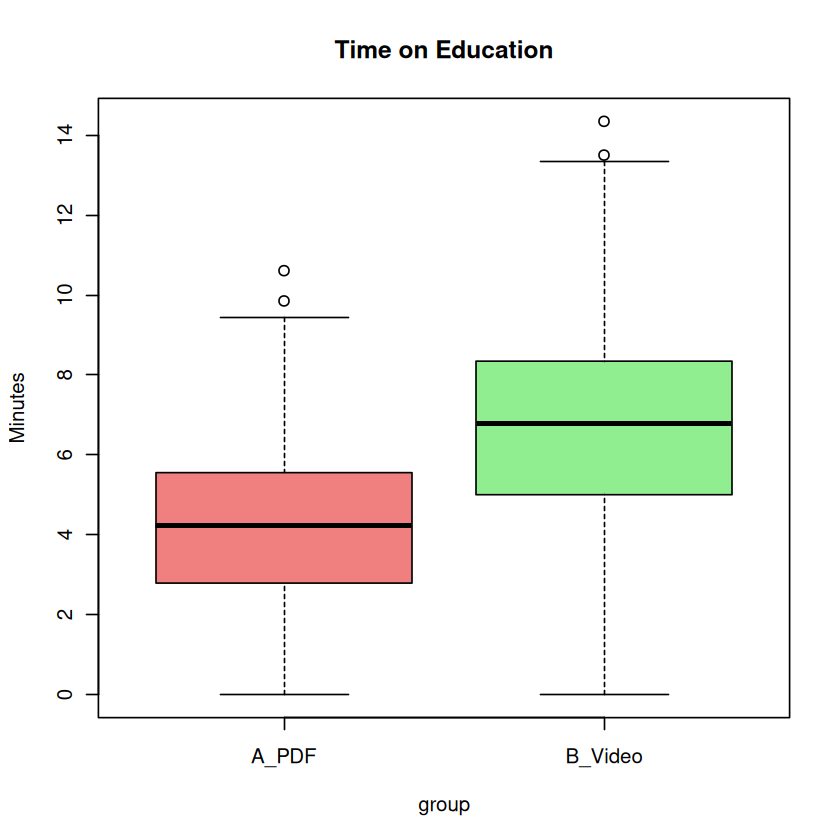

In [14]:
# Example 3: T-test on continuous outcome (time in minutes)

# Goal: Increase time spent on educational content (minutes).
# A: Static PDF
# B: Interactive video module

set.seed(789)
n_A <- 800; n_B <- 800

# Simulated data: A ~ N(4.2, 2.1), B ~ N(6.8, 2.5)
time_A <- rnorm(n_A, mean = 4.2, sd = 2.1)
time_B <- rnorm(n_B, mean = 6.8, sd = 2.5)
time_A[time_A < 0] <- 0
time_B[time_B < 0] <- 0

df <- data.frame(
  group = rep(c("A_PDF", "B_Video"), c(n_A, n_B)),
  time_minutes = c(time_A, time_B)
)

head(df)
tail(df)

# Visualize
boxplot(time_minutes ~ group, data = df, main = "Time on Education",
        ylab = "Minutes", col = c("lightcoral", "lightgreen"))

# T-test
t_result <- t.test(time_minutes ~ group, data = df, var.equal = FALSE)
print(t_result)

# Cohen's d (effect size)
library(effsize)
cohen_d <- cohen.d(time_minutes ~ group, data = df)
print(cohen_d)

In [15]:
cat("🔹 What Cohen’s d Measures

Cohen’s d quantifies how large the difference between two means is, in units of standard deviations.

It tells you how much two groups differ — not just whether that difference is statistically significant 
(as the t-test does).

")

cat("

So:

If d=0.0: the groups have nearly identical means.

If d=1.0: their means differ by roughly one standard deviation.

🔹 Interpretation Guidelines (Cohen, 1988)

Cohen’s d	Interpretation
0.2	Small effect
0.5	Medium effect
0.8	Large effect

")

cat('

| **Test**        | **Purpose**                                                               |
| --------------- | ------------------------------------------------------------------------- |
| **t-test**      | Determines if the mean difference is statistically significant (p-value). |
| **Cohen’s *d*** | Quantifies the *magnitude* of that difference (effect size).              |

A t-test might show p < 0.05 (significant), but Cohen’s d tells you whether that difference is meaningful in practice.

')

🔹 What Cohen’s d Measures

Cohen’s d quantifies how large the difference between two means is, in units of standard deviations.

It tells you how much two groups differ — not just whether that difference is statistically significant 
(as the t-test does).



So:

If d=0.0: the groups have nearly identical means.

If d=1.0: their means differ by roughly one standard deviation.

🔹 Interpretation Guidelines (Cohen, 1988)

Cohen’s d	Interpretation
0.2	Small effect
0.5	Medium effect
0.8	Large effect



| **Test**        | **Purpose**                                                               |
| --------------- | ------------------------------------------------------------------------- |
| **t-test**      | Determines if the mean difference is statistically significant (p-value). |
| **Cohen’s *d*** | Quantifies the *magnitude* of that difference (effect size).              |

A t-test might show p < 0.05 (significant), but Cohen’s d tells you whether that difference is meaningful in pra

In [16]:
print("CUPED")

cat("

CUPED stands for Controlled-experiment Using Pre-Experiment Data, 
and it’s a technique used to reduce variance and improve statistical power in A/B testing 
by leveraging baseline (pre-treatment) data.

")

cat("

You’re testing whether Group B improves medication adherence compared to Group A. You have:

Pre-experiment data: % of days each user was adherent before the intervention.

Post-experiment data: % of days each user was adherent after the intervention.

True effect: Group B improves adherence by 3 percentage points.

")

[1] "CUPED"


CUPED stands for Controlled-experiment Using Pre-Experiment Data, 
and it’s a technique used to reduce variance and improve statistical power in A/B testing 
by leveraging baseline (pre-treatment) data.



You’re testing whether Group B improves medication adherence compared to Group A. You have:

Pre-experiment data: % of days each user was adherent before the intervention.

Post-experiment data: % of days each user was adherent after the intervention.

True effect: Group B improves adherence by 3 percentage points.



In [17]:
# 1. Simulate Users and Baseline Adherence

set.seed(101)
n <- 3000
users <- data.frame(
  user_id = 1:n,
  baseline_adherence = rbeta(n, 2, 5) * 100,
  group = rep(c("A", "B"), each = n/2)
)

head(users, 2)
tail(users, 2)

# 2. Simulate Post-Experiment Adherence

users$post_adherence <- with(users,
  baseline_adherence * 0.8 + 
  rnorm(n, mean = 0, sd = 10) +
  ifelse(group == "B", 3, 0)
)

head(users, 2)
tail(users, 2)

,user_id,baseline_adherence,group
,<int>,<dbl>,<chr>
1,1,22.43462,A
2,2,41.04880,A


,user_id,baseline_adherence,group
,<int>,<dbl>,<chr>
2999,2999,39.13654,B
3000,3000,22.26258,B


,user_id,baseline_adherence,group,post_adherence
,<int>,<dbl>,<chr>,<dbl>
1,1,22.43462,A,14.58406
2,2,41.04880,A,31.02739


,user_id,baseline_adherence,group,post_adherence
,<int>,<dbl>,<chr>,<dbl>
2999,2999,39.13654,B,27.0495
3000,3000,22.26258,B,4.6183


In [18]:
# This compares average post-adherence between groups without using baseline data.
# It may detect the effect, but with more noise.

t_standard <- t.test(post_adherence ~ group, data = users)
print(t_standard)

# Apply CUPED Adjustment

cv <- cov(users$baseline_adherence, users$post_adherence)
theta <- cv / var(users$baseline_adherence)
users$cuped <- users$post_adherence - theta * users$baseline_adherence

head(users, 2)
tail(users, 2)

# CUPED uses baseline adherence to reduce noise in the post-adherence measurement.
# theta is the adjustment factor based on covariance.
# cuped is the adjusted outcome.

t_cuped <- t.test(cuped ~ group, data = users)
print(t_cuped)

# Measure Variance Reduction
# This calculates how much variance was reduced by using CUPED.
# Lower variance = more statistical power.

var_standard <- var(users$post_adherence[users$group == "A"]) + var(users$post_adherence[users$group == "B"])
var_cuped <- var(users$cuped[users$group == "A"]) + var(users$cuped[users$group == "B"])
cat(sprintf("\nVariance reduction: %.1f%%\n", 100 * (1 - var_cuped / var_standard)))

cat('Lower variance = more statistical power.')

cat('

Standard t-test: compares raw post-treatment outcomes.

CUPED t-test: adjusts for baseline behavior to reduce noise.

Benefit: CUPED improves sensitivity and reduces required sample size.

')


	Welch Two Sample t-test

data:  post_adherence by group
t = -6.4125, df = 2997.7, p-value = 1.658e-10
alternative hypothesis: true difference in means between group A and group B is not equal to 0
95 percent confidence interval:
 -4.951980 -2.632771
sample estimates:
mean in group A mean in group B 
       22.67678        26.46916 



,user_id,baseline_adherence,group,post_adherence,cuped
,<int>,<dbl>,<chr>,<dbl>,<dbl>
1,1,22.43462,A,14.58406,-3.390051
2,2,41.04880,A,31.02739,-1.859985


,user_id,baseline_adherence,group,post_adherence,cuped
,<int>,<dbl>,<chr>,<dbl>,<dbl>
2999,2999,39.13654,B,27.0495,-4.305818
3000,3000,22.26258,B,4.6183,-13.217983



	Welch Two Sample t-test

data:  cuped by group
t = -8.0874, df = 2997.6, p-value = 8.76e-16
alternative hypothesis: true difference in means between group A and group B is not equal to 0
95 percent confidence interval:
 -3.683397 -2.245865
sample estimates:
mean in group A mean in group B 
      0.1176764       3.0823075 


Variance reduction: 61.6%
Lower variance = more statistical power.

Standard t-test: compares raw post-treatment outcomes.

CUPED t-test: adjusts for baseline behavior to reduce noise.

Benefit: CUPED improves sensitivity and reduces required sample size.



In [19]:
?cov

cor {stats},R Documentation
x,"a numeric vector, matrix or data frame."
y,"NULL (default) or a vector, matrix or data frame with compatible dimensions to x. The default is equivalent to y = x (but more efficient)."
na.rm,logical. Should missing values be removed?
use,"an optional character string giving a method for computing covariances in the presence of missing values. This must be (an abbreviation of) one of the strings ""everything"", ""all.obs"", ""complete.obs"", ""na.or.complete"", or ""pairwise.complete.obs""."
method,"a character string indicating which correlation coefficient (or covariance) is to be computed. One of ""pearson"" (default), ""kendall"", or ""spearman"": can be abbreviated."
V,"symmetric numeric matrix, usually positive definite such as a covariance matrix."




AB Test with Patient Stratification - Medication Adherence App

Scenario: A hospital tests two versions of a medication reminder app, 
stratifying by age group to see if effects differ. 



── Attaching core tidyverse packages ──────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


patient_id,age_group,app_version,adherence_score
<int>,<chr>,<chr>,<dbl>
1,41-65,Gamified,89.57723
2,41-65,Gamified,77.13450


patient_id,age_group,app_version,adherence_score
<int>,<chr>,<chr>,<dbl>
799,41-65,Gamified,96.08845
800,65+,Standard,54.02468


[1] 800   4

[1] "Gamified" "Standard"

[1] "41-65" "18-40" "65+"

# A tibble: 2 × 4
  app_version     n mean_adherence sd_adherence
  <chr>       <int>          <dbl>        <dbl>
1 Gamified      403           77.4         13.4
2 Standard      397           75.6         13.0
# A tibble: 6 × 5
  age_group app_version     n mean_adherence sd_adherence
  <chr>     <chr>       <int>          <dbl>        <dbl>
1 18-40     Gamified      133           80.6         12.3
2 18-40     Standard      132           71.8         13.4
3 41-65     Gamified      145           79.7         11.7
4 41-65     Standard      158           79.0         11.9
5 65+       Gamified      125           71.2         14.3
6 65+       Standard      107           75.3         12.8

T test



	Welch Two Sample t-test

data:  adherence_score by app_version
t = 1.8768, df = 797.83, p-value = 0.06091
alternative hypothesis: true difference in means between group Gamified and group Standard is not equal to 0
95 percent confidence interval:
 -0.08038593  3.58214705
sample estimates:
mean in group Gamified mean in group Standard 
              77.36220               75.61132 



ANOVA


Call:
   aov(formula = adherence_score ~ app_version * age_group, data = data)

Terms:
                app_version age_group app_version:age_group Residuals
Sum of Squares       613.08   5467.64               5361.53 128130.98
Deg. of Freedom           1         2                     2       794

Residual standard error: 12.70331
Estimated effects may be unbalanced

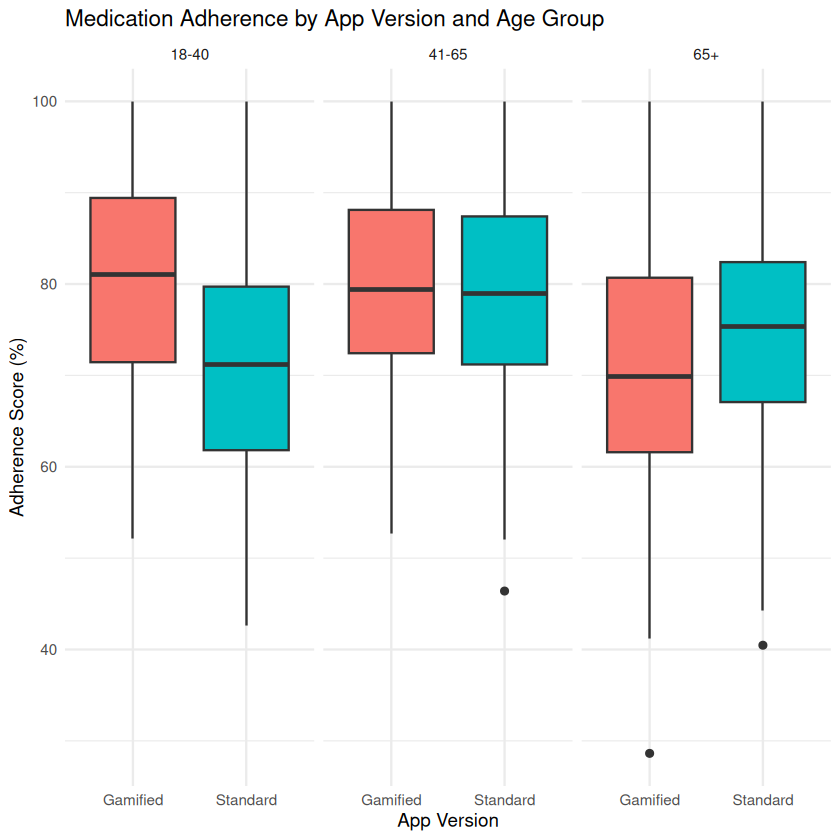

In [20]:
cat("

AB Test with Patient Stratification - Medication Adherence App

Scenario: A hospital tests two versions of a medication reminder app, 
stratifying by age group to see if effects differ. 

")   

library(tidyverse)

# Simulate data with age stratification
set.seed(456)
n <- 800

data <- tibble(
  patient_id = 1:n,
  age_group = sample(c("18-40", "41-65", "65+"), n, replace = TRUE, 
                     prob = c(0.3, 0.4, 0.3)),
  app_version = sample(c("Standard", "Gamified"), n, replace = TRUE),
  adherence_score = case_when(
    app_version == "Standard" & age_group == "18-40" ~ rnorm(n, 72, 15),
    app_version == "Standard" & age_group == "41-65" ~ rnorm(n, 78, 12),
    app_version == "Standard" & age_group == "65+" ~ rnorm(n, 75, 14),
    app_version == "Gamified" & age_group == "18-40" ~ rnorm(n, 82, 13),
    app_version == "Gamified" & age_group == "41-65" ~ rnorm(n, 80, 12),
    app_version == "Gamified" & age_group == "65+" ~ rnorm(n, 71, 15)
  )
) %>%
  mutate(adherence_score = pmin(pmax(adherence_score, 0), 100))

head(data, 2)
tail(data, 2)
dim(data)
unique(data$app_version)
unique(data$age_group)

# Overall analysis
overall_results <- data %>%
  group_by(app_version) %>%
  summarise(
    n = n(),
    mean_adherence = mean(adherence_score),
    sd_adherence = sd(adherence_score)
  )

print(overall_results)

# Stratified analysis
stratified_results <- data %>%
  group_by(age_group, app_version) %>%
  summarise(
    n = n(),
    mean_adherence = mean(adherence_score),
    sd_adherence = sd(adherence_score),
    .groups = "drop"
  )

print(stratified_results)

cat("\nT test\n")
# T-test overall
t.test(adherence_score ~ app_version, data = data)

cat("\nANOVA\n")
# ANOVA to test interaction between age and version
 aov(adherence_score ~ app_version * age_group, data = data)

# Visualization
ggplot(data, aes(x = app_version, y = adherence_score, fill = app_version)) +
  geom_boxplot() +
  facet_wrap(~ age_group) +
  labs(title = "Medication Adherence by App Version and Age Group",
       y = "Adherence Score (%)",
       x = "App Version") +
  theme_minimal() +
  theme(legend.position = "none")

In [21]:
# T TEST

# The Gamified app group had a mean adherence score of 77.4, while the Standard app averaged 75.6 
# — about 1.75 points higher for Gamified users.

# The p-value (0.061) is slightly above 0.05, meaning:
# There is no statistically significant difference at the conventional 5% level.
# But it’s marginal — we might say it trends toward significance (suggestive but not strong evidence).
# The 95% CI (–0.08 to 3.58) crosses zero → cons

# Two-way ANOVA (App × Age Group)

# | Effect                      | Meaning                    | p-value      | Interpretation                                                          |
# | :-------------------------- | :------------------------- | :----------- | :---------------------------------------------------------------------- |
# | **app_version**             | Main effect of app version | 0.0516       | Marginal — similar to t-test; overall difference between apps is small  |
# | **age_group**               | Main effect of age group   | **6.24e-08** | Very significant — adherence differs strongly by age group overall      |
# | **app_version × age_group** | Interaction                | **8.56e-08** | Very significant — the effect of the app version *depends on* age group |


# | Question                                                    | Result          | Interpretation                  |
# | :---------------------------------------------------------- | :-------------- | :------------------------------ |
# | Is there a global difference between Gamified and Standard? | *p ≈ 0.06*      | Slight, non-significant         |
# | Does adherence vary by age?                                 | ***p < 0.001*** | Strong differences by age group |
# | Does the app’s effect depend on age?                        | ***p < 0.001*** | Yes — clear interaction         |


In [22]:
# NOTES :

# Both t-tests and ANOVA (Analysis of Variance) compare means between groups.

# | Situation                | Typical test |
# | :----------------------- | :----------- |
# | Compare 2 groups         | **t-test**   |
# | Compare 3 or more groups | **ANOVA**    |

# A two-sample t-test and a one-way ANOVA with two groups give the same result (identical p-value).

# summary(aov(adherence_score ~ app_version , data = data))
# summary(aov(adherence_score ~ app_version + age_group, data = data))
# summary(aov(adherence_score ~ app_version * age_group, data = data))

In [23]:
t.test(adherence_score ~ app_version, data = data)
summary(aov(adherence_score ~ app_version , data = data))

#🔹 Why ANOVA is needed

# When you have more than two groups, you could do multiple t-tests —
# but that inflates your Type I error rate (the chance of false positives).

# ANOVA solves that by testing all group means simultaneously with one overall F-test.
# You have three age groups (18–40, 41–65, 65+).

# You want to test if at least one has a different mean adherence.
# → Use ANOVA, not three pairwise t-tests.

# The statistical idea
# Both t-tests and ANOVA compare variance between groups to variance within groups.
# ANOVA generalizes this to many groups → ratio forms the F statistic.

# Step 1: Why post-hoc tests are needed
# When ANOVA gives a significant result, it only tells you:
# “At least one group mean is different from the others.”
# … but it doesn’t tell which groups differ.

#🔹 Step 2: How to test pairwise differences
# You now run pairwise t-tests between all groups — but corrected for multiple comparisons.
# 🔹 Step 3: The correction — controlling false positives
# Doing multiple t-tests increases the chance of false positives (Type I error).
# That’s why we use post-hoc tests with correction.

# Common options:

# Method	What it does
# | Method                                          | What it does                                                           |
# | :---------------------------------------------- | :--------------------------------------------------------------------- |
# | **Tukey’s HSD** (Honest Significant Difference) | The *classic* post-hoc for ANOVA; adjusts for all pairwise comparisons |
# | **Bonferroni**                                  | Very conservative, divides α by #comparisons                           |
# | **Holm**                                        | Slightly less conservative than Bonferroni                             |
# | **Scheffé**                                     | For any linear combination of means (flexible)                         |

anova_model <- aov(adherence_score ~ age_group, data = data)
summary(anova_model)
TukeyHSD(anova_model)

# Each row = one pairwise comparison.
# diff = mean difference.
# lwr, upr = 95% confidence interval.
# p adj = adjusted p-value (corrected for multiple testing)



	Welch Two Sample t-test

data:  adherence_score by app_version
t = 1.8768, df = 797.83, p-value = 0.06091
alternative hypothesis: true difference in means between group Gamified and group Standard is not equal to 0
95 percent confidence interval:
 -0.08038593  3.58214705
sample estimates:
mean in group Gamified mean in group Standard 
              77.36220               75.61132 


             Df Sum Sq Mean Sq F value Pr(>F)  
app_version   1    613   613.1   3.521  0.061 .
Residuals   798 138960   174.1                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             Df Sum Sq Mean Sq F value   Pr(>F)    
age_group     2   5279  2639.5   15.66 2.12e-07 ***
Residuals   797 134294   168.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = adherence_score ~ age_group, data = data)

$age_group
                 diff        lwr        upr     p adj
41-65-18-40  3.175893  0.6123225  5.7394631 0.0104061
65+-18-40   -3.142323 -5.8828028 -0.4018435 0.0197995
65+-41-65   -6.318216 -8.9772683 -3.6591635 0.0000001


In [24]:
cat("

From 1 variable → n variables: the general idea

A t-test compares 2 groups (1 variable).

A one-way ANOVA compares 3+ groups (1 variable).

A two-way ANOVA analyzes 2 variables (and their interaction).

A multi-way ANOVA (sometimes called n-way ANOVA) analyzes n categorical independent variables — and all their possible interactions.

expands automatically into:

p_version+age_group+gender+(app_version:age_group)+(app_version:gender)+(age_group:gender)+(app_version:age_

Once you include many factors, there are many possible comparisons.

You can still use Tukey’s HSD, but now specify which factor or interaction you’re testing.

")



From 1 variable → n variables: the general idea

A t-test compares 2 groups (1 variable).

A one-way ANOVA compares 3+ groups (1 variable).

A two-way ANOVA analyzes 2 variables (and their interaction).

A multi-way ANOVA (sometimes called n-way ANOVA) analyzes n categorical independent variables — and all their possible interactions.

expands automatically into:

p_version+age_group+gender+(app_version:age_group)+(app_version:gender)+(age_group:gender)+(app_version:age_

Once you include many factors, there are many possible comparisons.

You can still use Tukey’s HSD, but now specify which factor or interaction you’re testing.



In [25]:
TukeyHSD(anova_model, "age_group")
TukeyHSD(anova_model, "app_version:age_group")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = adherence_score ~ age_group, data = data)

$age_group
                 diff        lwr        upr     p adj
41-65-18-40  3.175893  0.6123225  5.7394631 0.0104061
65+-18-40   -3.142323 -5.8828028 -0.4018435 0.0197995
65+-41-65   -6.318216 -8.9772683 -3.6591635 0.0000001


Warning message in qtukey(conf.level, length(means), x$df.residual):
“NaNs produced”


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = adherence_score ~ age_group, data = data)

$<NA>
     diff lwr upr p adj


In [27]:
# data$app_version <- factor(data$app_version)
# data$age_group <- factor(data$age_group)

# anova_model <- aov(adherence_score ~ app_version * age_group, data = data)

library(emmeans) 

# (Estimated Marginal Means) package
# This gives you pairwise comparisons within each age group and automatically adjusts p-values for multiple tests.
# emmeans(anova_model, pairwise ~ app_version | age_group)


In [28]:
cat("

When “n variables” becomes too many

If you have many predictors, not all categorical, or continuous ones too:

You move beyond ANOVA to a multiple linear regression model:

lm(adherence_score ~ app_version + age_group + gender + bmi + time_since_diagnosis, data = data)

summary()

")



When “n variables” becomes too many

If you have many predictors, not all categorical, or continuous ones too:

You move beyond ANOVA to a multiple linear regression model:

lm(adherence_score ~ app_version + age_group + gender + bmi + time_since_diagnosis, data = data)

summary()



In [29]:
print("Fit a 3-way ANOVA (app × age × gender) ")

library(tidyverse)
library(emmeans)

set.seed(123)
n <- 900

data3 <- tibble(
  patient_id  = 1:n,
  age_group   = sample(c("18-40", "41-65", "65+"), n, replace = TRUE,
                       prob = c(0.3, 0.4, 0.3)),
  app_version = sample(c("Standard", "Gamified"), n, replace = TRUE),
  gender      = sample(c("Male", "Female"), n, replace = TRUE)
) %>%
  mutate(
    # Base mean by age
    base_mean = case_when(
      age_group == "18-40" ~ 75,
      age_group == "41-65" ~ 78,
      age_group == "65+"   ~ 73
    ),
    
    # App effect depends on age (interaction app × age)
    app_effect = case_when(
      app_version == "Gamified" & age_group == "18-40" ~ +7,
      app_version == "Gamified" & age_group == "41-65" ~ +2,
      app_version == "Gamified" & age_group == "65+"   ~ -3,
      TRUE ~ 0
    ),
    
    # Small gender effect (e.g. females slightly higher adherence)
    gender_effect = case_when(
      gender == "Female" ~ +2,
      TRUE ~ 0
    ),
    
    # Generate adherence with some noise
    adherence_score = base_mean + app_effect + gender_effect + rnorm(n, 0, 10),
    adherence_score = pmin(pmax(adherence_score, 0), 100)
  )

head(data3)

ref_grid(anova_model)


[1] "Fit a 3-way ANOVA (app × age × gender) "


patient_id,age_group,app_version,gender,base_mean,app_effect,gender_effect,adherence_score
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,41-65,Gamified,Female,78,2,2,80.53573
2,18-40,Gamified,Female,75,7,2,69.66438
3,65+,Standard,Female,73,0,2,67.09392
4,18-40,Standard,Male,75,0,0,83.85112
5,18-40,Gamified,Female,75,7,2,93.03076
6,41-65,Gamified,Male,78,2,0,100.00000


 age_group prediction    SE  df
 18-40           76.2 0.797 797
 41-65           79.4 0.746 797
 65+             73.1 0.852 797


In [30]:
library(tidyverse)
library(emmeans)

# ... data3 simulated ...

anova3 <- aov(adherence_score ~ app_version * age_group * gender,
              data = data3)
summary(anova3)


# Get estimated marginal means for app × age × gender
emm_full <- emmeans(anova3, ~ app_version * age_group * gender)
emm_df   <- as.data.frame(emm_full)

head(emm_df)


                              Df Sum Sq Mean Sq F value   Pr(>F)    
app_version                    1   1314    1314  14.059 0.000189 ***
age_group                      2  11435    5718  61.153  < 2e-16 ***
gender                         1    898     898   9.600 0.002007 ** 
app_version:age_group          2   4096    2048  21.903 5.19e-10 ***
app_version:gender             1     43      43   0.458 0.498582    
age_group:gender               2    251     125   1.341 0.262105    
app_version:age_group:gender   2    566     283   3.028 0.048926 *  
Residuals                    888  83024      93                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,app_version,age_group,gender,emmean,SE,df,lower.CL,upper.CL
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Gamified,18-40,Female,84.45539,1.2807325,888,81.94178,86.96901
2,Standard,18-40,Female,76.35442,1.2086648,888,73.98225,78.72660
3,Gamified,41-65,Female,83.20211,1.0192356,888,81.20172,85.20250
4,Standard,41-65,Female,79.07618,0.9718031,888,77.16888,80.98348
5,Gamified,65+,Female,70.64592,1.2182196,888,68.25499,73.03684
6,Standard,65+,Female,76.78004,1.1812952,888,74.46158,79.09850


In [31]:
print("Adjustments for Multiple Testing")

[1] "Adjustments for Multiple Testing"


In [32]:
cat("

🎯 1. Why we need adjustment
# When you test many hypotheses at once, you increase your chance of finding false positives (Type I errors).
# Example:
# You run 20 independent tests with α = 0.05.
# Even if none of them are truly significant, on average
# 20 × 0.05 = 1 test will appear significant just by chance.
# So the more tests you do, the higher the risk of incorrectly calling something “significant.

# 🧩 2. The logic behind “20 × 0.05 = 1”
# When we say:
# “If you run 20 tests at α = 0.05, about 1 will be significant by chance,”
# we mean on average, if all null hypotheses are actually true.

# Here’s the reasoning:

# For each hypothesis test, when the null hypothesis is true,
# the probability of a false positive (incorrectly rejecting H₀) is α = 0.05.

# The number of false positives among m independent tests follows a Binomial distribution:
# X ∼ Binomial(n=m,p=α)

# The expected (average) number of false positives is: E[X] = m × α
# So if  α = 0.05: E[X] = 20 × 0.05 = 1
# That means: on average, you’ll get 1 false positive per 20 tests — purely due to random chance, 
# even if nothing real is happening.

")



🎯 1. Why we need adjustment
# When you test many hypotheses at once, you increase your chance of finding false positives (Type I errors).
# Example:
# You run 20 independent tests with α = 0.05.
# Even if none of them are truly significant, on average
# 20 × 0.05 = 1 test will appear significant just by chance.
# So the more tests you do, the higher the risk of incorrectly calling something “significant.

# 🧩 2. The logic behind “20 × 0.05 = 1”
# When we say:
# “If you run 20 tests at α = 0.05, about 1 will be significant by chance,”
# we mean on average, if all null hypotheses are actually true.

# Here’s the reasoning:

# For each hypothesis test, when the null hypothesis is true,
# the probability of a false positive (incorrectly rejecting H₀) is α = 0.05.

# The number of false positives among m independent tests follows a Binomial distribution:
# X ∼ Binomial(n=m,p=α)

# The expected (average) number of false positives is: E[X] = m × α
# So if  α = 0.05: E[X] = 20 × 0.05 = 1
# T

In [33]:
cat("
| Concept        | What it means                                                                     |
| -------------- | --------------------------------------------------------------------------------- |
| **FWER**       | Probability that **at least one** false positive occurs                           |
| **FDR**        | Expected **proportion** of false positives among the significant ones             |
| **Bonferroni** | Protects strongly against *any* false positives (too strict in large-scale data)  |
| **BH / FDR**   | Allows some false positives but controls their *rate* — better for large datasets |
")



| Concept        | What it means                                                                     |
| -------------- | --------------------------------------------------------------------------------- |
| **FWER**       | Probability that **at least one** false positive occurs                           |
| **FDR**        | Expected **proportion** of false positives among the significant ones             |
| **Bonferroni** | Protects strongly against *any* false positives (too strict in large-scale data)  |
| **BH / FDR**   | Allows some false positives but controls their *rate* — better for large datasets |


In [34]:
cat("

FWER – Family-Wise Error Rate

Probability of making at least one false positive among all tests.

𝑚
m = number of hypotheses/tests

𝛼
α = significance threshold (e.g. 0.05)

")

alpha <- 0.05
m <- 20
FWER <- 1 - (1 - alpha)^m
FWER

cat("

Bonferroni correction

The Bonferroni method controls the FWER by making each test stricter:

Only p-values ≤ α′ are considered significant.

")

alpha <- 0.05
m <- 20
alpha_prime <- alpha / m
alpha_prime




FWER – Family-Wise Error Rate

Probability of making at least one false positive among all tests.

𝑚
m = number of hypotheses/tests

𝛼
α = significance threshold (e.g. 0.05)



[1] 0.6415141



Bonferroni correction

The Bonferroni method controls the FWER by making each test stricter:

Only p-values ≤ α′ are considered significant.



[1] 0.0025

In [35]:

cat("

FDR – False Discovery Rate

Expected proportion of false positives among the rejected (significant) hypotheses.

FDR=E[V/R]
𝑉
V = number of false positives

𝑅
R = total number of rejected hypotheses
(if R=0, FDR = 0 by definition)

FDR doesn’t forbid false positives — it limits their proportion.
")

cat("

Benjamini–Hochberg (BH) procedure

This controls the FDR, not FWER — it’s less strict and better for large-scale data (e.g., gene expression).

Algorithm:

Sort p-values ascending: 
Compute critical values:
Find the largest i such that ≤p(i)crit
	​
All p-values up to that i are significant.
")

pvals <- c(0.001, 0.02, 0.03, 0.07, 0.5)
p.adjust(pvals, method = "BH")




FDR – False Discovery Rate

Expected proportion of false positives among the rejected (significant) hypotheses.

FDR=E[V/R]
𝑉
V = number of false positives

𝑅
R = total number of rejected hypotheses
(if R=0, FDR = 0 by definition)

FDR doesn’t forbid false positives — it limits their proportion.


Benjamini–Hochberg (BH) procedure

This controls the FDR, not FWER — it’s less strict and better for large-scale data (e.g., gene expression).

Algorithm:

Sort p-values ascending: 
Compute critical values:
Find the largest i such that ≤p(i)crit
	​
All p-values up to that i are significant.


[1] 0.0050 0.0500 0.0500 0.0875 0.5000

In [36]:
cat("

| Goal                  | What it’s protecting against                          |
| --------------------- | ----------------------------------------------------- |
| **Bonferroni / FWER** | “I don’t want *any* false positives.”                 |
| **BH / FDR**          | “I accept that maybe 5% of my discoveries are false.” |

")



| Goal                  | What it’s protecting against                          |
| --------------------- | ----------------------------------------------------- |
| **Bonferroni / FWER** | “I don’t want *any* false positives.”                 |
| **BH / FDR**          | “I accept that maybe 5% of my discoveries are false.” |



In [37]:
cat("Non-parametric tests\n")

cat('
Scenario, Parametric Test, Non-Parametric Alternative, Why Non-Parametric?

Conversion rate (binary), Z-test / Chi-square,Fisher’s Exact Test, "Small sample, rare events"

"Time on page, revenue (continuous)", T-test, Mann-Whitney U (Wilcoxon rank-sum), "Skewed, heavy-tailed data"

Ordinal ratings (1–5 stars),T-test / ANOVA,Wilcoxon / Kruskal-Wallis, Not interval-scale

Multiple groups,ANOVA,Kruskal-Wallis,Non-normal residuals
')

# Test,Use Case,Non-Parametric Test,R Code
# 1,Click-through rate (small n),Fisher’s Exact,fisher.test(table)
# 2,Time to book appointment (skewed),Mann-Whitney U,wilcox.test()
# 3,Patient satisfaction (1–5),Wilcoxon rank-sum,wilcox.test()
# 4,Cost per patient (outliers),Mann-Whitney U,wilcox.test()

# ?wilcox.test

Non-parametric tests

Scenario, Parametric Test, Non-Parametric Alternative, Why Non-Parametric?

Conversion rate (binary), Z-test / Chi-square,Fisher’s Exact Test, "Small sample, rare events"

"Time on page, revenue (continuous)", T-test, Mann-Whitney U (Wilcoxon rank-sum), "Skewed, heavy-tailed data"

Ordinal ratings (1–5 stars),T-test / ANOVA,Wilcoxon / Kruskal-Wallis, Not interval-scale

Multiple groups,ANOVA,Kruskal-Wallis,Non-normal residuals


In [38]:
cat("

The Mann–Whitney U test and the Wilcoxon rank-sum test are essentially the same test, 
but they come from different historical origins and notations.

Both tests compare two independent samples to determine whether their distributions differ, 
typically interpreted as testing whether one tends to have larger values than the other.

They are both non-parametric alternatives to the two-sample t-test.

In R: wilcox.test() = Mann-Whitney U = Wilcoxon rank-sum

")




The Mann–Whitney U test and the Wilcoxon rank-sum test are essentially the same test, 
but they come from different historical origins and notations.

Both tests compare two independent samples to determine whether their distributions differ, 
typically interpreted as testing whether one tends to have larger values than the other.

They are both non-parametric alternatives to the two-sample t-test.

In R: wilcox.test() = Mann-Whitney U = Wilcoxon rank-sum



In [39]:
cat("

| Aspect                 | **Mann–Whitney U test**                                                                                   | **Wilcoxon rank-sum test**                  |
| ---------------------- | --------------------------------------------------------------------------------------------------------- | ------------------------------------------- |
| **Origin**             | Developed by Henry Mann & Donald Whitney (1947)                                                           | Developed earlier by Frank Wilcoxon (1945)  |
| **Statistic computed** | ( U ) statistic (based on counts of rank comparisons)                                                     | ( W ) statistic (sum of ranks in one group) |
| **Relationship**       | ( U = W - \frac{n_1(n_1 + 1)}{2} )                                                                        | ( W = U + \frac{n_1(n_1 + 1)}{2} )          |
| **Data type**          | Two independent samples                                                                                   | Two independent samples                     |
| **Interpretation**     | Tests whether the probability that a randomly chosen observation from A is greater than from B equals 0.5 | Same idea, expressed as rank-sum difference |

")



| Aspect                 | **Mann–Whitney U test**                                                                                   | **Wilcoxon rank-sum test**                  |
| ---------------------- | --------------------------------------------------------------------------------------------------------- | ------------------------------------------- |
| **Origin**             | Developed by Henry Mann & Donald Whitney (1947)                                                           | Developed earlier by Frank Wilcoxon (1945)  |
| **Statistic computed** | ( U ) statistic (based on counts of rank comparisons)                                                     | ( W ) statistic (sum of ranks in one group) |
| **Relationship**       | ( U = W - rac{n_1(n_1 + 1)}{2} )                                                                        | ( W = U + rac{n_1(n_1 + 1)}{2} )          |
| **Data type**          | Two independent samples                                             

In [40]:
set.seed(123)
groupA <- rnorm(30, mean = 100, sd = 10)
groupB <- rnorm(30, mean = 105, sd = 10)

# Wilcoxon rank-sum test (same as Mann–Whitney)
res <- wilcox.test(groupA, groupB)
res

n1 <- length(groupA)
U <- res$statistic - n1 * (n1 + 1) / 2
U


	Wilcoxon rank sum exact test

data:  groupA and groupB
W = 259, p-value = 0.004313
alternative hypothesis: true location shift is not equal to 0


W 
-206

In [41]:
cat("There’s Also: Wilcoxon Signed-Rank Test")

cat("

| Test Name                                           | Data Type                      | Purpose                                                            | Equivalent Parametric Test |
| --------------------------------------------------- | ------------------------------ | ------------------------------------------------------------------ | -------------------------- |
| **Wilcoxon Rank-Sum Test** (aka **Mann–Whitney U**) | 2 **independent** samples      | Compare whether one group tends to have larger values than another | 2-sample **t-test**        |
| **Wilcoxon Signed-Rank Test**                       | 2 **paired/dependent** samples | Compare before/after (paired) measurements                         | **Paired t-test**          |

")

set.seed(123)

# Simulated data: same 20 patients, before & after treatment
before <- rnorm(20, mean = 140, sd = 10)
after  <- before - rnorm(20, mean = 5, sd = 5)  # treatment lowers BP by ~5

# Paired Wilcoxon signed-rank test
res <- wilcox.test(before, after, paired = TRUE, alternative = "greater")

res

There’s Also: Wilcoxon Signed-Rank Test

| Test Name                                           | Data Type                      | Purpose                                                            | Equivalent Parametric Test |
| --------------------------------------------------- | ------------------------------ | ------------------------------------------------------------------ | -------------------------- |
| **Wilcoxon Rank-Sum Test** (aka **Mann–Whitney U**) | 2 **independent** samples      | Compare whether one group tends to have larger values than another | 2-sample **t-test**        |
| **Wilcoxon Signed-Rank Test**                       | 2 **paired/dependent** samples | Compare before/after (paired) measurements                         | **Paired t-test**          |




	Wilcoxon signed rank exact test

data:  before and after
V = 197, p-value = 8.392e-05
alternative hypothesis: true location shift is greater than 0


In [42]:
# A step-by-step explanation of how the sum of ranks works in the Mann-Whitney U / Wilcoxon rank-sum test 
# — with visuals, math, and R code.

cat('

Value,Group,Rank
2.1,A,1
3.4,A,2
4.0,B,3
5.2,A,4
6.5,B,5
7.1,B,6

Group,Ranks,Sum of Ranks
A,"1, 2, 4",7
B,"3, 5, 6",14

Statistic,Formula,
Wilcoxon W
Mann-Whitney U

Compare to expected value and compute the p-value
')

# Data
group <- factor(rep(c("A", "B", "C"), each = 3))
values <- c(3, 5, 2, 8, 7, 6, 4, 5, 3)

# Step 1: Rank all observations together
ranks <- rank(values, ties.method = "average")
ranks 

# Combine into a data frame
df <- data.frame(group, values, ranks)
df

# Compute sum of ranks per group

aggregate(ranks ~ group, data = df, FUN = sum)

# Compute the Wilcoxon W statistic

# The Wilcoxon rank-sum test statistic (W) for a group is simply the sum of its 
# WA = 7
# 𝑊𝐵 = 14

# Compute the Mann–Whitney U statistic

# Expected value and variance under H₀

# Compute Z-score and p-value (normal approximation)



Value,Group,Rank
2.1,A,1
3.4,A,2
4.0,B,3
5.2,A,4
6.5,B,5
7.1,B,6

Group,Ranks,Sum of Ranks
A,"1, 2, 4",7
B,"3, 5, 6",14

Statistic,Formula,
Wilcoxon W
Mann-Whitney U

Compare to expected value and compute the p-value


[1] 2.5 5.5 1.0 9.0 8.0 7.0 4.0 5.5 2.5

group,values,ranks
<fct>,<dbl>,<dbl>
A,3,2.5
A,5,5.5
A,2,1.0
B,8,9.0
B,7,8.0
B,6,7.0
C,4,4.0
C,5,5.5
C,3,2.5


group,ranks
<fct>,<dbl>
A,9
B,24
C,12


In [43]:
cat("Kruskal-Wallis")

Kruskal-Wallis

In [44]:
cat("

The Kruskal-Wallis test is a non-parametric (distribution-free) statistical test used to compare three or 
more independent groups when the assumptions of one-way ANOVA (e.g., normality and equal variances) are not met. 
It is the non-parametric alternative to one-way ANOVA.

When to Use Kruskal-Wallis

Use it when:

You have 3 or more independent groups (e.g., treatment A, B, C).
The dependent variable is ordinal or continuous but not normally distributed.
You want to test whether the distributions (typically medians) of the groups are the same.

It does not test means directly — it tests whether the ranks of the data differ across groups.

")

cat("

Key Idea: Rank-Based

Combine all data from all groups.

Combine all data from all groups.
Rank all observations from lowest to highest (1, 2, 3, …).
Sum the ranks within each group.
If groups are similar, their sums of ranks should be close.
If one group tends to have higher (or lower) values, its rank sum will differ.

The Kruskal–Wallis statistic 𝐻 : H measures how different those rank sums are.


Steps to Perform Kruskal-Wallis


Rank all data across groups (1 = smallest, handle ties by averaging).
Sum ranks for each group ($R_i$).
Compute H using the formula.
Compare H to critical value from chi-square table (df = k−1) or get p-value.
Reject H₀ if p-value < α (usually 0.05).


Post-Hoc Tests (if H is significant)


Since Kruskal-Wallis is omnibus, follow up with:

Dunn’s test (with Bonferroni correction)
Pairwise Wilcoxon rank-sum (Mann-Whitney) tests

")



The Kruskal-Wallis test is a non-parametric (distribution-free) statistical test used to compare three or 
more independent groups when the assumptions of one-way ANOVA (e.g., normality and equal variances) are not met. 
It is the non-parametric alternative to one-way ANOVA.

When to Use Kruskal-Wallis

Use it when:

You have 3 or more independent groups (e.g., treatment A, B, C).
The dependent variable is ordinal or continuous but not normally distributed.
You want to test whether the distributions (typically medians) of the groups are the same.

It does not test means directly — it tests whether the ranks of the data differ across groups.



Key Idea: Rank-Based

Combine all data from all groups.

Combine all data from all groups.
Rank all observations from lowest to highest (1, 2, 3, …).
Sum the ranks within each group.
If groups are similar, their sums of ranks should be close.
If one group tends to have higher (or lower) values, its rank sum will differ.

The Kruskal–Wallis stat

In [45]:
set.seed(123)
pain_A <- rpois(20, 5)
pain_B <- rpois(20, 7)
pain_C <- rpois(20, 6)

pain <- c(pain_A, pain_B, pain_C)
group <- factor(rep(c("A_standard", "B_new_drug", "C_physiotherapy"), each = 20))

head(pain)
head(group)

tail(pain)
tail(group)

kruskal.test(pain ~ group)

# p = 0.009 → reject H₀ → at least one treatment group has a different median pain reduction.

cat("Post-hoc pairwise comparisons")

library(FSA)
dunnTest(pain ~ group, method = "bonferroni")

# This means at least one group differs significantly from the others in median pain reduction.
# Post-hoc Dunn pairwise comparisons
# | Comparison                       | Z     | p.unadj | p.adj (Bonferroni) | Interpretation                                |
# | -------------------------------- | ----- | ------- | ------------------ | --------------------------------------------- |
# | **A_standard – B_new_drug**      | −2.30 | 0.021   | **0.064**          | borderline (not significant after Bonferroni) |
# | **A_standard – C_physiotherapy** | +0.63 | 0.528   | 1.000              | not significant                               |
# | **B_new_drug – C_physiotherapy** | +2.94 | 0.0033  | **0.010**          | significant difference                        |

# Summary:
# Kruskal–Wallis p < 0.01 → reject H₀ (some group differs)
# Dunn post-hoc:
# B vs C → significant
# A vs B → borderline
# A vs C → no differenc

[1] 4 7 4 8 9 2

[1] A_standard A_standard A_standard A_standard A_standard A_standard
Levels: A_standard B_new_drug C_physiotherapy

[1] 6 4 3 8 9 5

[1] C_physiotherapy C_physiotherapy C_physiotherapy C_physiotherapy
[5] C_physiotherapy C_physiotherapy
Levels: A_standard B_new_drug C_physiotherapy


	Kruskal-Wallis rank sum test

data:  pain by group
Kruskal-Wallis chi-squared = 9.5545, df = 2, p-value = 0.008419


Post-hoc pairwise comparisons

## FSA v0.10.0. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.




                    Comparison          Z     P.unadj       P.adj
1      A_standard - B_new_drug -2.3049645 0.021168563 0.063505689
2 A_standard - C_physiotherapy  0.6311212 0.527961264 1.000000000
3 B_new_drug - C_physiotherapy  2.9360857 0.003323825 0.009971474

Loading required package: ggpubr

Registered S3 methods overwritten by 'car':
  method       from
  hist.boot    FSA 
  confint.boot FSA 


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




Data simulated. First 6 rows:
         time status        arm
1  4.65240310      1 A_standard
2 10.38634094      1 A_standard
3  5.60569047      1 A_standard
4  0.08504318      1 A_standard
5  0.88620726      1 A_standard
6  1.39062109      1 A_standard
Call: survfit(formula = Surv(time, status) ~ arm, data = dat_surv)

                  n events median 0.95LCL 0.95UCL
arm=A_standard  300    208   6.84    6.07    7.83
arm=B_intensive 300    174   9.93    8.10   12.15

Log-Rank Test:
  Chi-square = 11.39, df = 1, p-value = 0.0007

Cox Model Results:
Call:
coxph(formula = Surv(time, status) ~ arm, data = dat_surv)

  n= 600, number of events= 382 

                  coef exp(coef) se(coef)      z Pr(>|z|)    
armB_intensive -0.3472    0.7067   0.1034 -3.359 0.000783 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
armB_intensive    0.7067      1.415    0.5771    0.8654

Concordance= 0.54  (se = 0.015 )
Likelih

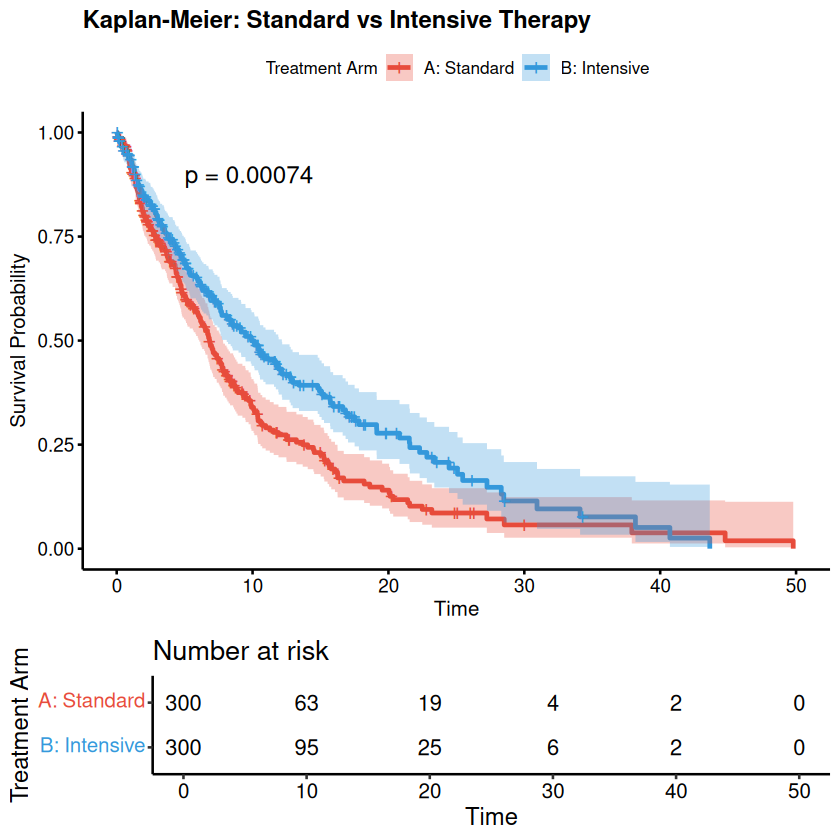

In [46]:
# ===================================================================
# SURVIVAL A/B TEST: Standard vs Intensive Therapy
# Simulation + Kaplan-Meier + Log-Rank + Cox (Frequentist)
# ===================================================================

# --------------------------------------------------
# 1. SETUP & PACKAGES
# --------------------------------------------------
set.seed(2025)
library(survival)
library(survminer)     # for nice KM plots
library(dplyr)

# --------------------------------------------------
# 2. SIMULATION PARAMETERS
# --------------------------------------------------
n_per_arm <- 300
arm <- rep(c("A_standard", "B_intensive"), each = n_per_arm)

# True hazard rates: B has 30% lower hazard (better survival)
lambda_A <- 0.10   # 10% hazard per unit time
lambda_B <- 0.07   # 7% hazard per unit time

# --------------------------------------------------
# 3. GENERATE EVENT TIMES (Exponential distribution)
# --------------------------------------------------
rate_vec <- ifelse(arm == "A_standard", lambda_A, lambda_B)
true_event_time <- rexp(n = length(arm), rate = rate_vec)

# --------------------------------------------------
# 4. GENERATE CENSORING TIMES (Independent)
# --------------------------------------------------
censor_time <- rexp(n = length(arm), rate = 0.05)  # ~5% censoring per unit time

# --------------------------------------------------
# 5. OBSERVED DATA
# --------------------------------------------------
time_obs <- pmin(true_event_time, censor_time)
status   <- as.integer(true_event_time <= censor_time)  # 1 = event, 0 = censored

# --------------------------------------------------
# 6. DATA FRAME
# --------------------------------------------------
dat_surv <- data.frame(
  time   = time_obs,
  status = status,
  arm    = factor(arm, levels = c("A_standard", "B_intensive"))
)

cat("Data simulated. First 6 rows:\n")
print(head(dat_surv))

# --------------------------------------------------
# 7. KAPLAN-MEIER CURVES
# --------------------------------------------------
km_fit <- survfit(Surv(time, status) ~ arm, data = dat_surv)

# Print summary
print(km_fit)

# Plot with survminer
ggkm <- ggsurvplot(
  km_fit,
  data = dat_surv,
  risk.table = TRUE,
  pval = TRUE,
  pval.coord = c(5, 0.9),
  conf.int = TRUE,
  xlab = "Time",
  ylab = "Survival Probability",
  title = "Kaplan-Meier: Standard vs Intensive Therapy",
  legend.title = "Treatment Arm",
  legend.labs = c("A: Standard", "B: Intensive"),
  palette = c("#E74C3C", "#3498DB"),
  font.main = c(14, "bold"),
  font.x = c(12),
  font.y = c(12),
  font.tickslab = c(11)
)

print(ggkm)

# --------------------------------------------------
# 8. LOG-RANK TEST
# --------------------------------------------------
logrank <- survdiff(Surv(time, status) ~ arm, data = dat_surv)
logrank_p <- 1 - pchisq(logrank$chisq, df = 1)

cat(sprintf("\nLog-Rank Test:\n"))
cat(sprintf("  Chi-square = %.2f, df = 1, p-value = %.4f\n",
            logrank$chisq, logrank_p))

# --------------------------------------------------
# 9. COX PROPORTIONAL HAZARDS MODEL (Frequentist)
# --------------------------------------------------
cox_fit <- coxph(Surv(time, status) ~ arm, data = dat_surv)
cox_summary <- summary(cox_fit)

cat(sprintf("\nCox Model Results:\n"))
print(cox_summary)

# Hazard Ratio (B vs A)
HR <- exp(coef(cox_fit))
CI <- exp(confint(cox_fit))

HR_table <- data.frame(
  HR        = round(HR[1], 3),
  Lower_95  = round(CI[1], 3),
  Upper_95  = round(CI[2], 3),
  p_value   = round(coef(summary(cox_fit))[,"Pr(>|z|)"][1], 4)
)
rownames(HR_table) <- "B_intensive vs A_standard"

cat("\nHazard Ratio (B vs A):\n")
print(HR_table)

# --------------------------------------------------
# 10. FINAL SUMMARY TABLE (Log-Rank + Cox)
# --------------------------------------------------
summary_table <- data.frame(
  Method     = c("Log-Rank", "Cox (Frequentist)"),
  HR_B_vs_A  = c(NA, round(HR[1], 3)),
  Lower_95   = c(NA, round(CI[1], 3)),
  Upper_95   = c(NA, round(CI[2], 3)),
  p_value    = c(round(logrank_p, 4),
                 round(coef(summary(cox_fit))[,"Pr(>|z|)"][1], 4))
)

cat("\n=== FINAL RESULTS SUMMARY ===\n")
print(summary_table, row.names = FALSE)

# --------------------------------------------------
# 11. OPTIONAL: Save plot
# --------------------------------------------------
# ggsave("km_plot.png", ggkm$plot, width = 8, hei_



In [47]:
cat("Homoscedasticity")

Homoscedasticity

In [48]:
cat("

1. Homoscedasticity (Good!)
Definition: The variance of the residuals (errors) is constant across all levels of the independent variable(s).

In simple terms: The spread of the data points around the regression line is the same whether the predicted value is low, 
medium, or high.

→ Variance of the error = constant.

Why It Matters:

Required for valid inference in linear regression (e.g., p-values, confidence intervals).

")



1. Homoscedasticity (Good!)
Definition: The variance of the residuals (errors) is constant across all levels of the independent variable(s).

In simple terms: The spread of the data points around the regression line is the same whether the predicted value is low, 
medium, or high.

→ Variance of the error = constant.

Why It Matters:

Required for valid inference in linear regression (e.g., p-values, confidence intervals).



In [49]:
cat("Heteroscedasticity")

Heteroscedasticity

In [50]:
cat("

2. Heteroscedasticity (Problem !)

Definition: The variance of the residuals is NOT constant — it changes with the level of the independent variable(s).

The spread of errors increases or decreases as X increases.

→ Variance of the error changes.

Issue,Consequence

Biased standard errors,p-values and confidence intervals are wrong
Inefficient estimates,OLS is no longer BLUE (Best Linear Unbiased Estimator)
Invalid hypothesis tests,Can't trust t-tests or F-tests

")




2. Heteroscedasticity (Problem !)

Definition: The variance of the residuals is NOT constant — it changes with the level of the independent variable(s).

The spread of errors increases or decreases as X increases.

→ Variance of the error changes.

Issue,Consequence

Biased standard errors,p-values and confidence intervals are wrong
Inefficient estimates,OLS is no longer BLUE (Best Linear Unbiased Estimator)
Invalid hypothesis tests,Can't trust t-tests or F-tests



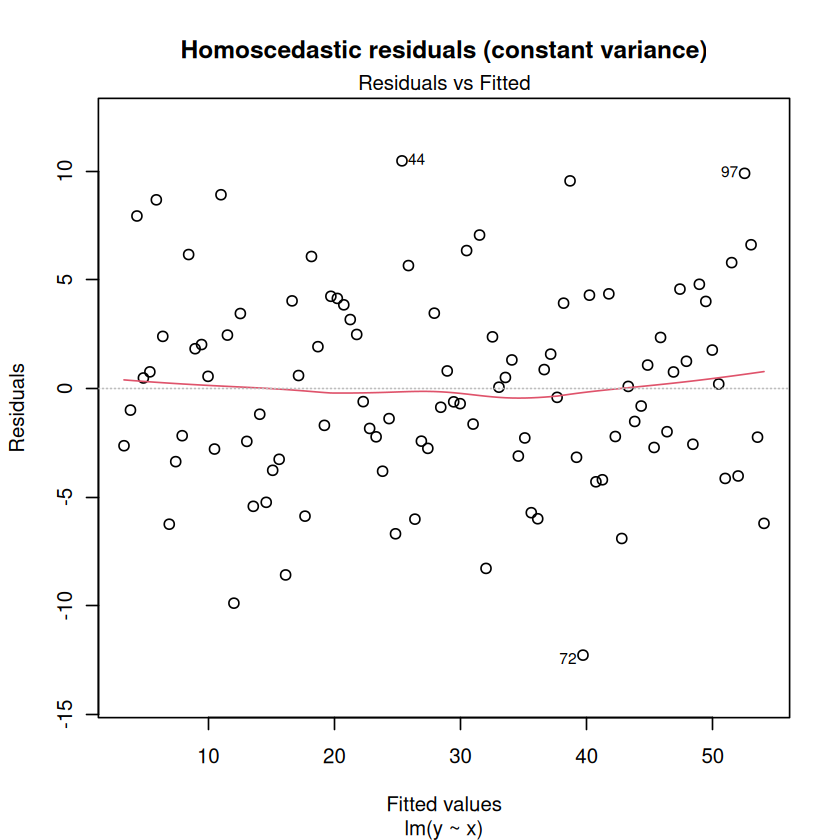

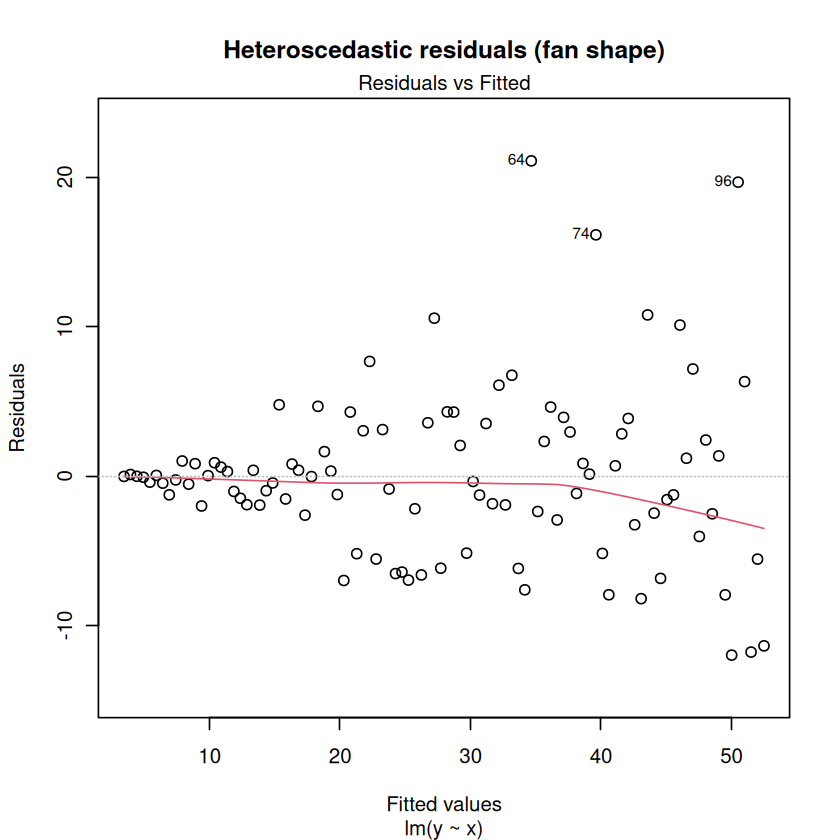

In [51]:
# ================================================================
# Example: Homoscedastic vs. Heteroscedastic residuals
# ================================================================

set.seed(123)

# Generate predictor x
x <- seq(1, 100, by = 1)

# ------------------------------
# Homoscedastic case
# ------------------------------
# Errors have constant variance (sd = 5)
y_homo <- 3 + 0.5 * x + rnorm(length(x), mean = 0, sd = 5)
df_homo <- data.frame(x = x, y = y_homo)

# Fit model
model_homo <- lm(y ~ x, data = df_homo)

# Plot residuals vs fitted values
plot(model_homo, which = 1, main = "Homoscedastic residuals (constant variance)")

# ------------------------------
# Heteroscedastic case
# ------------------------------
# Errors have variance that grows with x (sd = 0.1 * x)
y_hetero <- 3 + 0.5 * x + rnorm(length(x), mean = 0, sd = 0.1 * x)
df_hetero <- data.frame(x = x, y = y_hetero)

# Fit model
model_hetero <- lm(y ~ x, data = df_hetero)

# Plot residuals vs fitted values
plot(model_hetero, which = 1, main = "Heteroscedastic residuals (fan shape)")


In [52]:
cat('

Formal statistical tests:

library(lmtest)
bptest(model)   # Breusch–Pagan test

H₀: homoscedasticity
p < 0.05: reject H₀ → heteroscedasticity present

')

library(lmtest)

bptest(model_homo)

bptest(model_hetero)



Formal statistical tests:

library(lmtest)
bptest(model)   # Breusch–Pagan test

H₀: homoscedasticity
p < 0.05: reject H₀ → heteroscedasticity present



Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  model_homo
BP = 0.012209, df = 1, p-value = 0.912



	studentized Breusch-Pagan test

data:  model_hetero
BP = 12.996, df = 1, p-value = 0.0003122


In [54]:
cat("

| Concept                | Description             | Implication                                 |
| ---------------------- | ----------------------- | ------------------------------------------- |
| **Homoscedasticity**   | Constant error variance | OLS assumptions valid                       |
| **Heteroscedasticity** | Error variance changes  | Standard errors invalid, use robust methods |

")

cat("

OLS = Ordinary Least Squares

Ordinary Least Squares (OLS) is the most common method used to estimate the parameters of a linear regression model.

In plain terms:

OLS finds the “best-fitting” straight line through your data — the one that minimizes the sum of squared differences 
between the actual and predicted values.

# Simple OLS regression

model <- lm(y ~ x, data = df)
summary(model)

")



| Concept                | Description             | Implication                                 |
| ---------------------- | ----------------------- | ------------------------------------------- |
| **Homoscedasticity**   | Constant error variance | OLS assumptions valid                       |
| **Heteroscedasticity** | Error variance changes  | Standard errors invalid, use robust methods |



OLS = Ordinary Least Squares

Ordinary Least Squares (OLS) is the most common method used to estimate the parameters of a linear regression model.

In plain terms:

OLS finds the “best-fitting” straight line through your data — the one that minimizes the sum of squared differences 
between the actual and predicted values.

# Simple OLS regression

model <- lm(y ~ x, data = df)
summary(model)



What to do about heteroscedasticity ?
    
Typical transforms :

If variance grows with the mean → log transform

If counts → sqrt or log

If proportions near 0 or 1 → logit or arcsin sqrt




	studentized Breusch-Pagan test

data:  model_hetero
BP = 18.864, df = 1, p-value = 1.404e-05


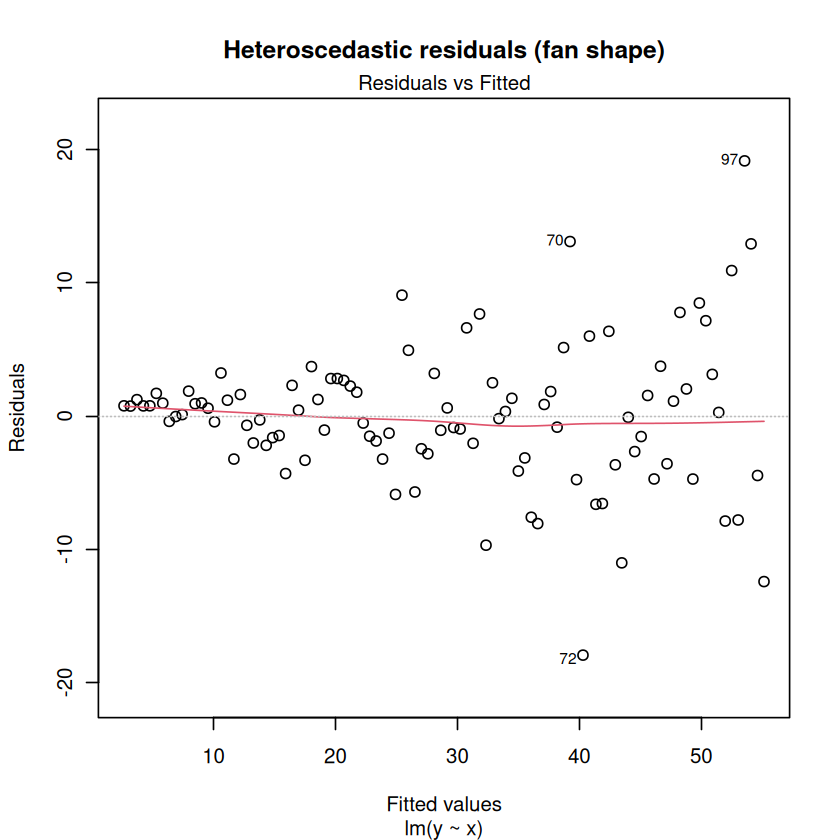


	studentized Breusch-Pagan test

data:  model_log
BP = 6.3026, df = 1, p-value = 0.01206


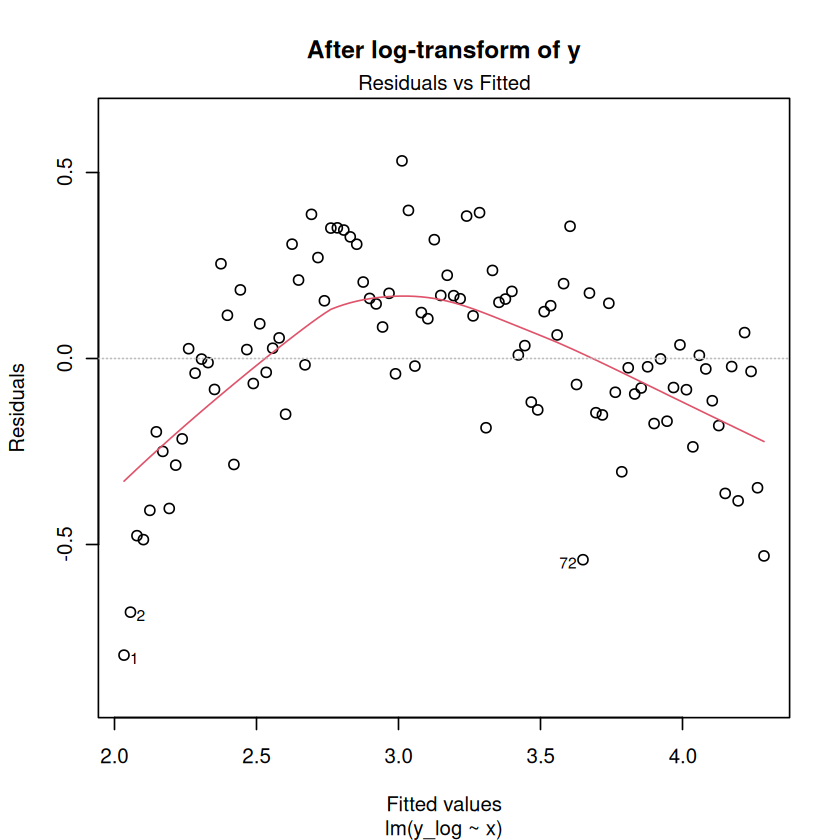

In [55]:
cat("What to do about heteroscedasticity ?
    
Typical transforms :

If variance grows with the mean → log transform

If counts → sqrt or log

If proportions near 0 or 1 → logit or arcsin sqrt

")

set.seed(123)
x <- 1:100

# Errors with increasing variance (heteroscedastic)
y_hetero <- 3 + 0.5 * x + rnorm(length(x), mean = 0, sd = 0.1 * x)
df_hetero <- data.frame(x = x, y = y_hetero)

# OLS model
model_hetero <- lm(y ~ x, data = df_hetero)

# Plot residuals vs fitted
plot(model_hetero, which = 1, main = "Heteroscedastic residuals (fan shape)")

library(lmtest)
bptest(model_hetero)

# Transform response
df_hetero$y_log <- log(df_hetero$y)

# Refit model
model_log <- lm(y_log ~ x, data = df_hetero)

# Plot residuals again
plot(model_log, which = 1, main = "After log-transform of y")

# Test again
bptest(model_log)


In [56]:
cat("

Generalized Linear Models (GLMs) can indeed help handle heteroscedasticity, but not in the same way as “fixing” it in a linear model.

Let’s unpack this properly — both conceptually and with R examples 👇

What is a GLM :

A Generalized Linear Model (GLM) extends ordinary linear regression (lm) by allowing:

Non-normal outcome distributions (e.g. Binomial, Poisson, Gamma, etc.)

Non-constant variance (heteroscedasticity) that depends on the mean

A link function connecting the mean to predictors

GLMs don’t “fix” heteroscedasticity — they model it

by using the correct likelihood function for the data’s mean–variance relationship.

So:

If your residual variance grows with the mean → try a Gamma GLM

If variance ≈ mean → Poisson GLM

If binary → Binomial GLM

For arbitrary variance → Weighted LS or GLS

")

cat('

# Generalized linear model (variance modeled via Gamma)
glm(y ~ x, family = Gamma(link = "log"), data = df)

')



Generalized Linear Models (GLMs) can indeed help handle heteroscedasticity, but not in the same way as “fixing” it in a linear model.

Let’s unpack this properly — both conceptually and with R examples 👇

What is a GLM :

A Generalized Linear Model (GLM) extends ordinary linear regression (lm) by allowing:

Non-normal outcome distributions (e.g. Binomial, Poisson, Gamma, etc.)

Non-constant variance (heteroscedasticity) that depends on the mean

A link function connecting the mean to predictors

GLMs don’t “fix” heteroscedasticity — they model it

by using the correct likelihood function for the data’s mean–variance relationship.

So:

If your residual variance grows with the mean → try a Gamma GLM

If variance ≈ mean → Poisson GLM

If binary → Binomial GLM

For arbitrary variance → Weighted LS or GLS



# Generalized linear model (variance modeled via Gamma)
glm(y ~ x, family = Gamma(link = "log"), data = df)



In [57]:
cat(' 

What is LOGIT ?

The logit function transforms a probability (between 0 and 1) into a real number between 
−∞ and +∞, and is defined as the logarithm of the odds:

logit(𝑝) = ln(p / (1-p))

| Probability (p) | Logit(p) Formula | Result      |
| --------------- | ---------------- | ----------- |
| (p = 0.5)       | (ln(1))         | (0)         |
| (p = 0.8)       | (ln(4))         | ≈ **1.39**  |
| (p = 0.2)       | (ln(0.25))      | ≈ **−1.39** |

To get back the probability, you apply the inverse logit (also called the sigmoid function).

| Step                  | Formula                 | Interpretation                                       |
| --------------------- | ----------------------- | ---------------------------------------------------- |
| **Forward (logit)**   | ( log(frac{p}{1-p}) ) | Converts a probability → linear predictor (log-odds) |
| **Inverse (sigmoid)** | ( frac{1}{1+e^{-x}} )  | Converts a linear predictor → probability            |

The inverse logit produces an S-shaped curve (“sigmoid”) that maps any real number → [0, 1].

That’s why it’s so popular in:
Logistic regression (binary classification)
Neural networks (sigmoid activation)
Probability calibration

')

 

What is LOGIT ?

The logit function transforms a probability (between 0 and 1) into a real number between 
−∞ and +∞, and is defined as the logarithm of the odds:

logit(𝑝) = ln(p / (1-p))

| Probability (p) | Logit(p) Formula | Result      |
| --------------- | ---------------- | ----------- |
| (p = 0.5)       | (ln(1))         | (0)         |
| (p = 0.8)       | (ln(4))         | ≈ **1.39**  |
| (p = 0.2)       | (ln(0.25))      | ≈ **−1.39** |

To get back the probability, you apply the inverse logit (also called the sigmoid function).

| Step                  | Formula                 | Interpretation                                       |
| --------------------- | ----------------------- | ---------------------------------------------------- |
| **Forward (logit)**   | ( log(frac{p}{1-p}) ) | Converts a probability → linear predictor (log-odds) |
| **Inverse (sigmoid)** | ( frac{1}{1+e^{-x}} )  | Converts a linear predictor → probability            |

The inverse logit produc

In [58]:
cat(' 

What is Welch T-test ?

| Situation                                          | Recommended test   |
| -------------------------------------------------- | ------------------ |
| Two independent samples with **equal variances**   | Student’s t-test   |
| Two independent samples with **unequal variances** | **Welch t-test** ✅ |
| Two related (paired) samples                       | Paired t-test      |

So if your groups have different spreads (heteroscedasticity), Welch’s t-test is the safer and more robust choice.
')

set.seed(123)
groupA <- rnorm(30, mean = 10, sd = 3)
groupB <- rnorm(40, mean = 12, sd = 6)

# Standard t-test with equal variance assumption
t.test(groupA, groupB, var.equal = TRUE)

# Welch’s t-test (default in R)
t.test(groupA, groupB) # or
t.test(groupA, groupB, var.equal = FALSE)


 

What is Welch T-test ?

| Situation                                          | Recommended test   |
| -------------------------------------------------- | ------------------ |
| Two independent samples with **equal variances**   | Student’s t-test   |
| Two independent samples with **unequal variances** | **Welch t-test** ✅ |
| Two related (paired) samples                       | Paired t-test      |

So if your groups have different spreads (heteroscedasticity), Welch’s t-test is the safer and more robust choice.



	Two Sample t-test

data:  groupA and groupB
t = -3.0041, df = 68, p-value = 0.003727
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.206542 -1.050376
sample estimates:
mean of x mean of y 
 9.858689 12.987148 



	Welch Two Sample t-test

data:  groupA and groupB
t = -3.23, df = 64.296, p-value = 0.001952
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.063213 -1.193705
sample estimates:
mean of x mean of y 
 9.858689 12.987148 



	Welch Two Sample t-test

data:  groupA and groupB
t = -3.23, df = 64.296, p-value = 0.001952
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.063213 -1.193705
sample estimates:
mean of x mean of y 
 9.858689 12.987148 


In [59]:
cat('

Quick diagnostic before choosing

You can check equality of variances with Levene’s test:

')

set.seed(123)

# Two groups with different spreads
groupA <- rnorm(30, mean = 10, sd = 2)
groupB <- rnorm(30, mean = 10, sd = 5)

# Combine into a data frame
df <- data.frame(
  values = c(groupA, groupB),
  group  = factor(rep(c("A", "B"), each = 30))
)

head(df)
tail(df)

# Install and load the car package if not installed
# install.packages("car")
library(car)

# Levene’s test
leveneTest(values ~ group, data = df)

cat('

| Statistic  | Value                                             | Interpretation                |
| ---------- | ------------------------------------------------- | ----------------------------- |
| F(1, 58)   | 10.46                                             | Significant                   |
| p-value    | 0.0020                                            | Reject H₀ → Unequal variances |
| Conclusion | Groups have different variances (heteroscedastic) |                               |
'
)



Quick diagnostic before choosing

You can check equality of variances with Levene’s test:



,values,group
,<dbl>,<fct>
1,8.879049,A
2,9.539645,A
3,13.117417,A
4,10.141017,A
5,10.258575,A
6,13.430130,A


,values,group
,<dbl>,<fct>
55,8.871145,B
56,17.582353,B
57,2.256236,B
58,12.923069,B
59,10.619271,B
60,11.079708,B


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:FSA’:

    bootCase


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,10.45648,0.002018728
,58,NA,NA




| Statistic  | Value                                             | Interpretation                |
| ---------- | ------------------------------------------------- | ----------------------------- |
| F(1, 58)   | 10.46                                             | Significant                   |
| p-value    | 0.0020                                            | Reject H₀ → Unequal variances |
| Conclusion | Groups have different variances (heteroscedastic) |                               |


In [60]:
cat('

If you understand how Welch’s t-test works for two groups (handling unequal variances), 
then Welch’s ANOVA is simply the generalization of that idea to three or more groups.

Welch’s ANOVA is a version of the standard one-way ANOVA that does not assume equal variances (homoscedasticity) across groups.
It’s often called:

“One-way ANOVA with unequal variances”

It is more robust when:

Groups have different variances, and/or

Groups have unequal sample sizes

| Feature                          | Classic ANOVA (`aov`) | Welch’s ANOVA                         |
| -------------------------------- | --------------------- | ------------------------------------- |
| Variances assumed equal?         | ✅ Yes                 | ❌ No                                  |
| Uses pooled variance?            | ✅ Yes                 | ❌ No                                  |
| Type of F-statistic              | Standard F            | Adjusted F (Welch correction)         |
| Robust to unequal n & variances? | ❌                     | ✅ Yes                                 |
| Function in R                    | `aov()`               | `oneway.test(..., var.equal = FALSE)` |

')

set.seed(123)

# Three groups with unequal variances
groupA <- rnorm(30, mean = 10, sd = 2)
groupB <- rnorm(30, mean = 12, sd = 4)
groupC <- rnorm(30, mean = 15, sd = 6)

df <- data.frame(
  values = c(groupA, groupB, groupC),
  group  = factor(rep(c("A", "B", "C"), each = 30))
)

# Standard ANOVA (assumes equal variances)
cat("aov")
anova_eq <- aov(values ~ group, data = df)
summary(anova_eq)

# Welch’s ANOVA (robust to unequal variances)
cat("oneway.test")
welch_anova <- oneway.test(values ~ group, data = df, var.equal = FALSE)
welch_anova

cat('

Welch’s ANOVA is a robust version of one-way ANOVA that allows for unequal variances and unequal sample sizes.
It uses an adjusted F-statistic and fractional degrees of freedom.

')

cat('

If the Welch ANOVA is significant → you can run Games-Howell post-hoc tests, 
which are the analog of Tukey’s test but for unequal variances.

')

library(rstatix)
games_howell_test(df, values ~ group)


# | Comparison | Mean difference (`estimate`) | 95% CI (`conf.low`–`conf.high`) | Adjusted p-value (`p.adj`) | Significance (`p.adj.signif`) | Interpretation                  |
# | ---------- | ---------------------------- | ------------------------------- | -------------------------- | ----------------------------- | ------------------------------- |
# | **A vs B** | 2.81                         | [1.10, 4.52]                    | 0.000708                   | ***                           | Significant difference          |
# | **A vs C** | 5.24                         | [2.76, 7.73]                    | 0.0000261                  | ****                          | Strongly significant difference |
# | **B vs C** | 2.43                         | [–0.30, 5.17]                   | 0.09                       | ns                            | Not significant                 |



If you understand how Welch’s t-test works for two groups (handling unequal variances), 
then Welch’s ANOVA is simply the generalization of that idea to three or more groups.

Welch’s ANOVA is a version of the standard one-way ANOVA that does not assume equal variances (homoscedasticity) across groups.
It’s often called:

“One-way ANOVA with unequal variances”

It is more robust when:

Groups have different variances, and/or

Groups have unequal sample sizes

| Feature                          | Classic ANOVA (`aov`) | Welch’s ANOVA                         |
| -------------------------------- | --------------------- | ------------------------------------- |
| Variances assumed equal?         | ✅ Yes                 | ❌ No                                  |
| Uses pooled variance?            | ✅ Yes                 | ❌ No                                  |
| Type of F-statistic              | Standard F            | Adjusted F (Welch correction)         |
| Robust to unequal n & varia

            Df Sum Sq Mean Sq F value   Pr(>F)    
group        2  412.7  206.34   14.65 3.28e-06 ***
Residuals   87 1225.1   14.08                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

oneway.test


	One-way analysis of means (not assuming equal variances)

data:  values and group
F = 17.83, num df = 2.000, denom df = 51.026, p-value = 1.343e-06




Welch’s ANOVA is a robust version of one-way ANOVA that allows for unequal variances and unequal sample sizes.
It uses an adjusted F-statistic and fractional degrees of freedom.



If the Welch ANOVA is significant → you can run Games-Howell post-hoc tests, 
which are the analog of Tukey’s test but for unequal variances.




Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




,.y.,group1,group2,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,values,A,B,2.807561,1.0956392,4.519483,7.08e-04,***
2,values,A,C,5.240730,2.7555844,7.725875,2.61e-05,****
3,values,B,C,2.433169,-0.3004712,5.166809,9.00e-02,ns


In [61]:
cat(' Confidence Intervals : 

A confidence interval is a range of values that is likely to contain the true population parameter (e.g., mean, proportion, difference) with a certain level of confidence.

It answers: "If I repeated my study many times, in what range would the true value usually fall?"

A confidence interval tells you:

CI = Estimate ± t ∗×SE

Where:

Estimate = sample mean (or coefficient)

SE = standard error (how variable your estimate is)

t* = critical value from the t-distribution for the desired confidence level (e.g., 1.96 for 95%)

Where:

Estimate = sample mean (or coefficient)

SE = standard error (how variable your estimate is)

t* = critical value from the t-distribution for the desired confidence level (e.g., 1.96 for 95%).

It reflects both precision (width of the interval) and certainty (confidence level).

| Level | Wider or Narrower | Confidence     |
| ----- | ----------------- | -------------- |
| 90%   | Narrower          | Less confident |
| 95%   | Medium            | Standard       |
| 99%   | Wider             | More confident |

True population mean (μ) = 50

Sample 1: 95% CI = [48, 54] → contains μ
Sample 2: 95% CI = [46, 52] → contains μ
Sample 3: 95% CI = [51, 57] → contains μ
...
Sample 96: 95% CI = [44, 48] → misses μ

→ 95 out of 100 intervals capture μ

')


 Confidence Intervals : 

A confidence interval is a range of values that is likely to contain the true population parameter (e.g., mean, proportion, difference) with a certain level of confidence.

It answers: "If I repeated my study many times, in what range would the true value usually fall?"

A confidence interval tells you:

CI = Estimate ± t ∗×SE

Where:

Estimate = sample mean (or coefficient)

SE = standard error (how variable your estimate is)

t* = critical value from the t-distribution for the desired confidence level (e.g., 1.96 for 95%)

Where:

Estimate = sample mean (or coefficient)

SE = standard error (how variable your estimate is)

t* = critical value from the t-distribution for the desired confidence level (e.g., 1.96 for 95%).

It reflects both precision (width of the interval) and certainty (confidence level).

| Level | Wider or Narrower | Confidence     |
| ----- | ----------------- | -------------- |
| 90%   | Narrower          | Less confident |
| 95%   | Medi

In [62]:
cat('

Formula (for a mean with known standard error)

CI = 𝑥 ± 𝑧 ∗ SE

Where:

𝑥 = sample mean

𝑧 = z-score for the desired confidence level (e.g., 1.96 for 95%)

SE = standard error of the mean

')

# Simulate sample data
set.seed(123)
sample <- rnorm(100, mean = 50, sd = 10)

# Calculate 95% confidence interval
mean_val <- mean(sample)
se <- sd(sample) / sqrt(length(sample))
ci_lower <- mean_val - 1.96 * se
ci_upper <- mean_val + 1.96 * se

cat(sprintf("95%% CI: [%.2f, %.2f]\n", ci_lower, ci_upper))

# It does NOT mean: There's a 95% probability the true value is in this specific interval 
# (the true value either is or isn't in there - we just don't know which).

cat('

The Core Concept : 95% Confidence Interval means:

If we repeated this study 100 times with different samples
About 95 of those intervals would contain the true population parameter
About 5 would miss it

')



Formula (for a mean with known standard error)

CI = 𝑥 ± 𝑧 ∗ SE

Where:

𝑥 = sample mean

𝑧 = z-score for the desired confidence level (e.g., 1.96 for 95%)

SE = standard error of the mean

95% CI: [49.11, 52.69]


The Core Concept : 95% Confidence Interval means:

If we repeated this study 100 times with different samples
About 95 of those intervals would contain the true population parameter
About 5 would miss it





Standard Deviation (SD) : Spread of individual data points

Standard Error (SE) : Spread of sample means

Standard Error : 

Standard Error ExplainedStandard Error (SE) measures how much sample statistics (like the mean) vary from sample to sample.
It tells you: "If I took many samples, how spread out would the sample means be?"

SE = SD / √n

where:
- SD = standard deviation
- n = sample size

=== CHOLESTEROL LEVELS ===
Sample size: 100 
Mean: 198.46 mg/dL
SD: 39.07 mg/dL ← variability between patients
SE: 3.91 mg/dL ← uncertainty about the mean

95% CI: 190.8 to 206.12 
This CI is built using the SE!



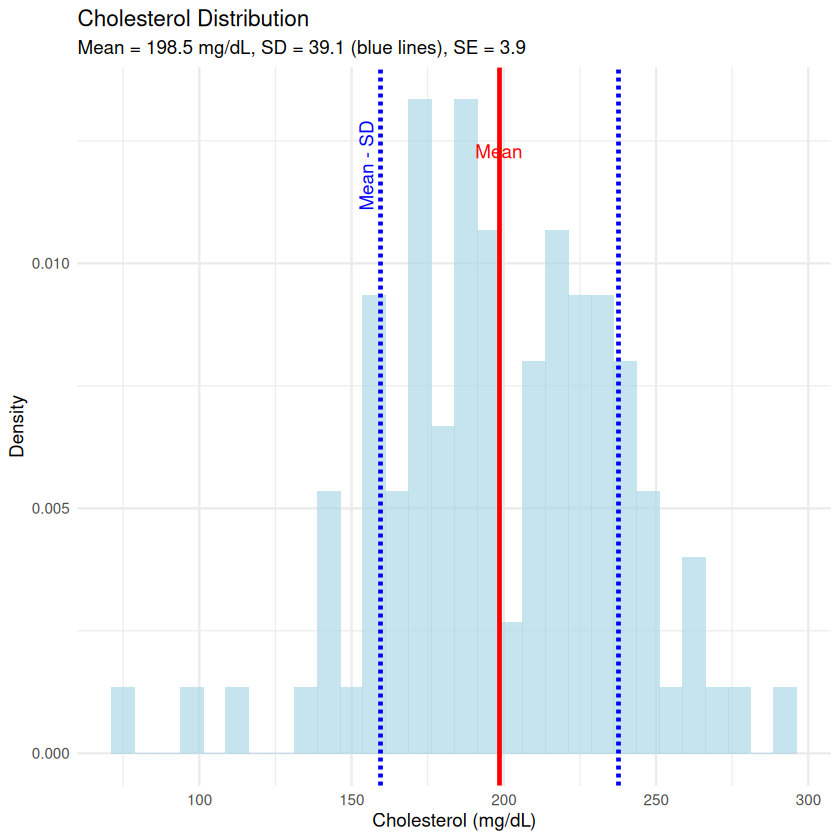

In [63]:
cat('

Standard Deviation (SD) : Spread of individual data points

Standard Error (SE) : Spread of sample means

Standard Error : 

Standard Error ExplainedStandard Error (SE) measures how much sample statistics (like the mean) vary from sample to sample.
It tells you: "If I took many samples, how spread out would the sample means be?"

SE = SD / √n

where:
- SD = standard deviation
- n = sample size

')

library(tidyverse)

set.seed(789)
n <- 100

# Generate cholesterol data
cholesterol <- rnorm(n, mean = 200, sd = 40)

# Calculate statistics
mean_chol <- mean(cholesterol)
sd_chol <- sd(cholesterol)
se_chol <- sd_chol / sqrt(n)

cat("=== CHOLESTEROL LEVELS ===\n")
cat("Sample size:", n, "\n")
cat("Mean:", round(mean_chol, 2), "mg/dL\n")
cat("SD:", round(sd_chol, 2), "mg/dL ← variability between patients\n")
cat("SE:", round(se_chol, 2), "mg/dL ← uncertainty about the mean\n\n")

# 95% CI using SE
ci_lower <- mean_chol - 1.96 * se_chol
ci_upper <- mean_chol + 1.96 * se_chol

cat("95% CI:", round(ci_lower, 2), "to", round(ci_upper, 2), "\n")
cat("This CI is built using the SE!\n\n")

# ===== VISUALIZE =====

chol_data <- tibble(cholesterol = cholesterol)

ggplot(chol_data, aes(x = cholesterol)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, 
                 fill = "lightblue", alpha = 0.7) +
  
  # Add SD markers
  geom_vline(xintercept = mean_chol, color = "red", linewidth = 1) +
  geom_vline(xintercept = c(mean_chol - sd_chol, mean_chol + sd_chol), 
             color = "blue", linetype = "dashed", linewidth = 1) +
  
  annotate("text", x = mean_chol, y = 0.012, label = "Mean", 
           color = "red", vjust = -0.5) +
  annotate("text", x = mean_chol - sd_chol, y = 0.012, label = "Mean - SD", 
           color = "blue", vjust = -0.5, angle = 90) +
  
  # Add SE visualization (not on same scale, shown in subtitle)
  labs(title = "Cholesterol Distribution",
       subtitle = paste0("Mean = ", round(mean_chol, 1), " mg/dL, ",
                        "SD = ", round(sd_chol, 1), " (blue lines), ",
                        "SE = ", round(se_chol, 1)),
       x = "Cholesterol (mg/dL)",
       y = "Density") +
  theme_minimal()

In [64]:
cat(' Central limit Theorem')

cat("

Central Limit Theorem (CLT) – Complete Explanation

The Central Limit Theorem (CLT) is one of the most powerful and fundamental ideas in statistics.

In simple terms:

No matter what the original population looks like (even if it's skewed, bimodal, or weird),
the distribution of sample means will be approximately normal — as long as the sample size is large enough.

Central Limit Theorem = Magic of Averages

Take enough samples → averages behave normally → This is why confidence intervals and t-tests work in real life

")

 Central limit Theorem

Central Limit Theorem (CLT) – Complete Explanation

The Central Limit Theorem (CLT) is one of the most powerful and fundamental ideas in statistics.

In simple terms:

No matter what the original population looks like (even if it's skewed, bimodal, or weird),
the distribution of sample means will be approximately normal — as long as the sample size is large enough.

Central Limit Theorem = Magic of Averages

Take enough samples → averages behave normally → This is why confidence intervals and t-tests work in real life

